Using device: cuda
Epoch 1/20
----------


Train Loss: 2.3380, Train Acc: 17.69%
Val Loss: 2.3055, Val Acc: 12.12%
Validation loss improved, saving model ...
Epoch 2/20
----------


Train Loss: 2.2467, Train Acc: 13.59%
Val Loss: 2.2208, Val Acc: 17.65%
Validation loss improved, saving model ...
Epoch 3/20
----------


Train Loss: 2.1873, Train Acc: 21.61%
Val Loss: 2.1592, Val Acc: 24.79%
Validation loss improved, saving model ...
Epoch 4/20
----------


Train Loss: 2.1221, Train Acc: 24.70%
Val Loss: 2.0914, Val Acc: 24.62%
Validation loss improved, saving model ...
Epoch 5/20
----------


Train Loss: 2.0494, Train Acc: 25.41%
Val Loss: 2.0162, Val Acc: 25.58%
Validation loss improved, saving model ...
Epoch 6/20
----------


Train Loss: 1.9781, Train Acc: 26.05%
Val Loss: 1.9455, Val Acc: 27.51%
Validation loss improved, saving model ...
Epoch 7/20
----------


Train Loss: 1.9100, Train Acc: 30.07%
Val Loss: 1.8829, Val Acc: 31.79%
Validation loss improved, saving model ...
Epoch 8/20
----------


Train Loss: 1.8462, Train Acc: 33.78%
Val Loss: 1.8237, Val Acc: 33.27%
Validation loss improved, saving model ...
Epoch 9/20
----------


Train Loss: 1.7869, Train Acc: 34.77%
Val Loss: 1.7756, Val Acc: 34.87%
Validation loss improved, saving model ...
Epoch 10/20
----------


Train Loss: 1.7300, Train Acc: 35.97%
Val Loss: 1.7072, Val Acc: 37.37%
Validation loss improved, saving model ...
Epoch 11/20
----------


Train Loss: 1.6774, Train Acc: 38.09%
Val Loss: 1.6599, Val Acc: 39.84%
Validation loss improved, saving model ...
Epoch 12/20
----------


Train Loss: 1.6295, Train Acc: 40.09%
Val Loss: 1.6110, Val Acc: 41.88%
Validation loss improved, saving model ...
Epoch 13/20
----------


Train Loss: 1.5848, Train Acc: 42.33%
Val Loss: 1.5710, Val Acc: 41.32%
Validation loss improved, saving model ...
Epoch 14/20
----------


Train Loss: 1.5426, Train Acc: 44.10%
Val Loss: 1.5334, Val Acc: 45.54%
Validation loss improved, saving model ...
Epoch 15/20
----------


Train Loss: 1.5034, Train Acc: 45.38%
Val Loss: 1.4970, Val Acc: 45.38%
Validation loss improved, saving model ...
Epoch 16/20
----------


Train Loss: 1.4661, Train Acc: 46.53%
Val Loss: 1.4620, Val Acc: 47.73%
Validation loss improved, saving model ...
Epoch 17/20
----------


Train Loss: 1.4302, Train Acc: 47.47%
Val Loss: 1.4165, Val Acc: 47.76%
Validation loss improved, saving model ...
Epoch 18/20
----------


Train Loss: 1.3962, Train Acc: 48.26%
Val Loss: 1.3897, Val Acc: 49.78%
Validation loss improved, saving model ...
Epoch 19/20
----------


Train Loss: 1.3638, Train Acc: 50.05%
Val Loss: 1.3582, Val Acc: 49.65%
Validation loss improved, saving model ...
Epoch 20/20
----------


<ipython-input-3-a8aa23a3e3b9>:258: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(early_stopping.path))


Train Loss: 1.3354, Train Acc: 50.82%
Val Loss: 1.3546, Val Acc: 50.78%
Validation loss improved, saving model ...


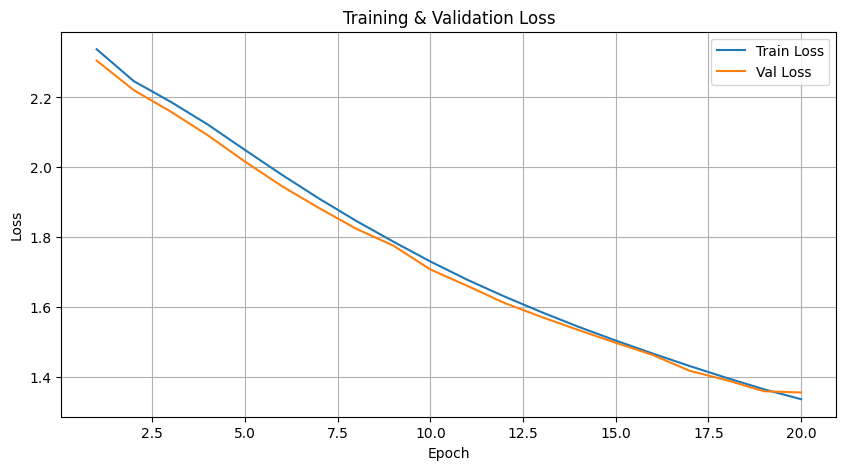

Test Accuracy: 50.87%
Test F1 Score: 0.4578


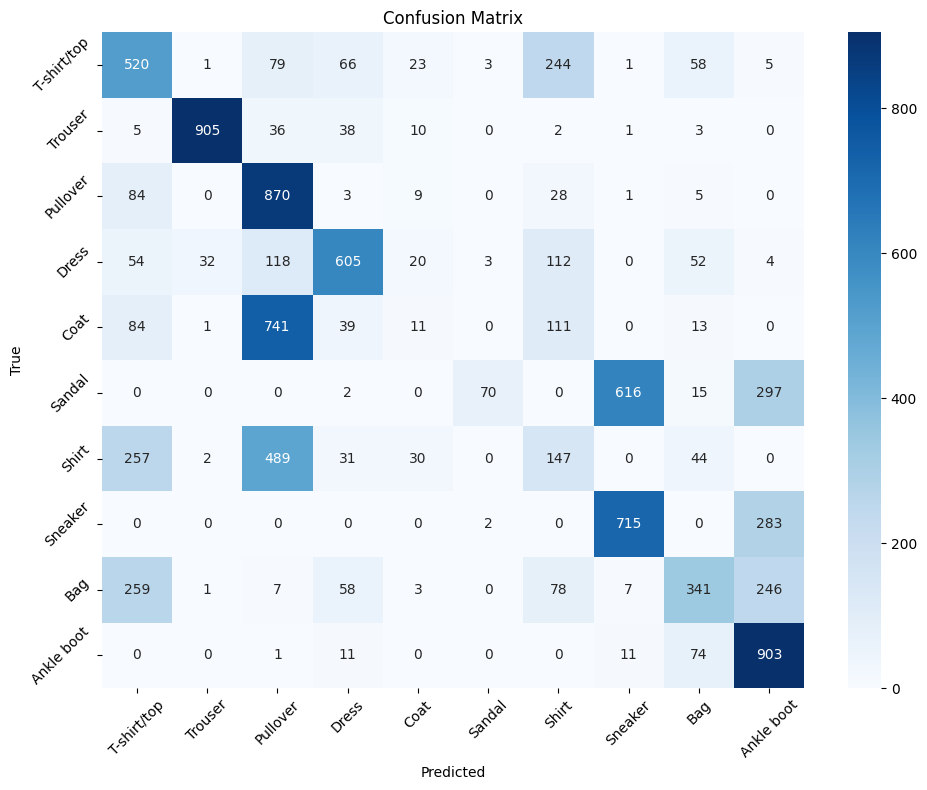

Model saved as fashion_cnn_modified_for_CAM.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Showing CAMs for 10 correct predictions (one from each class):


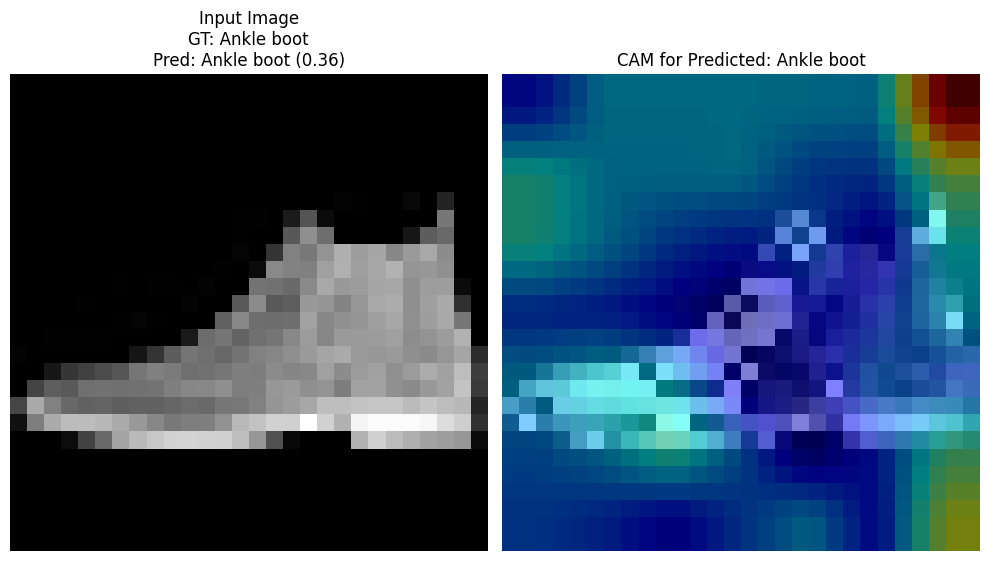

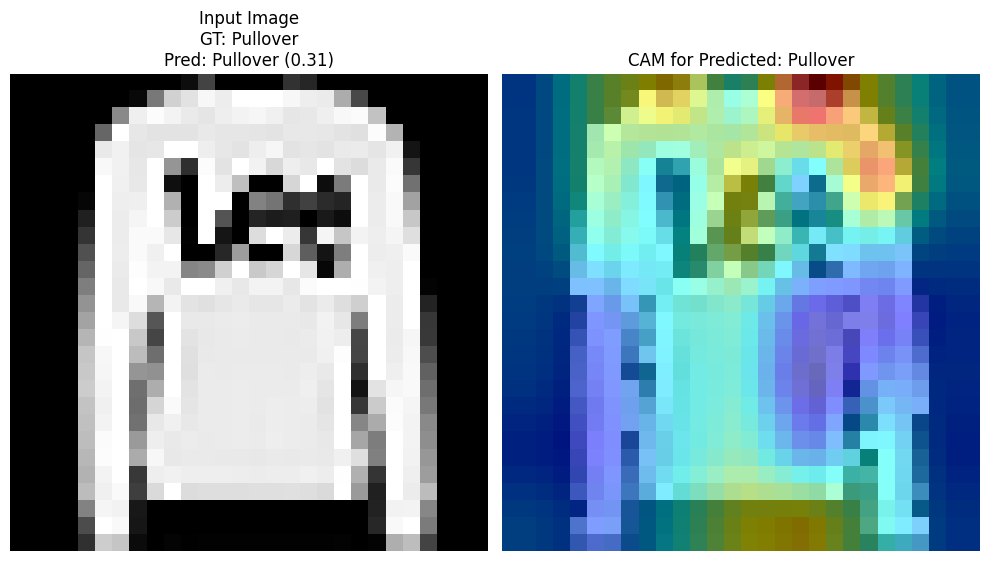

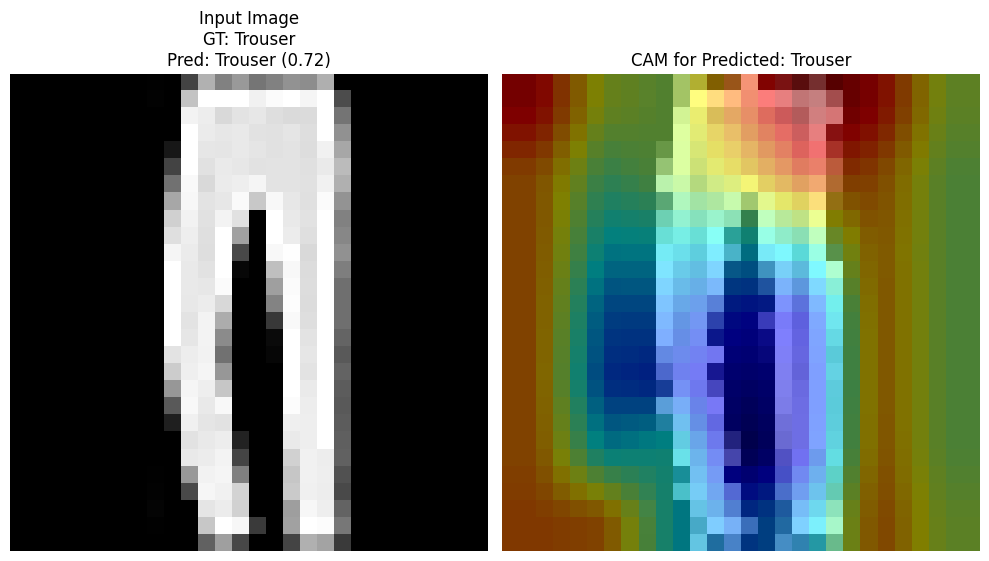

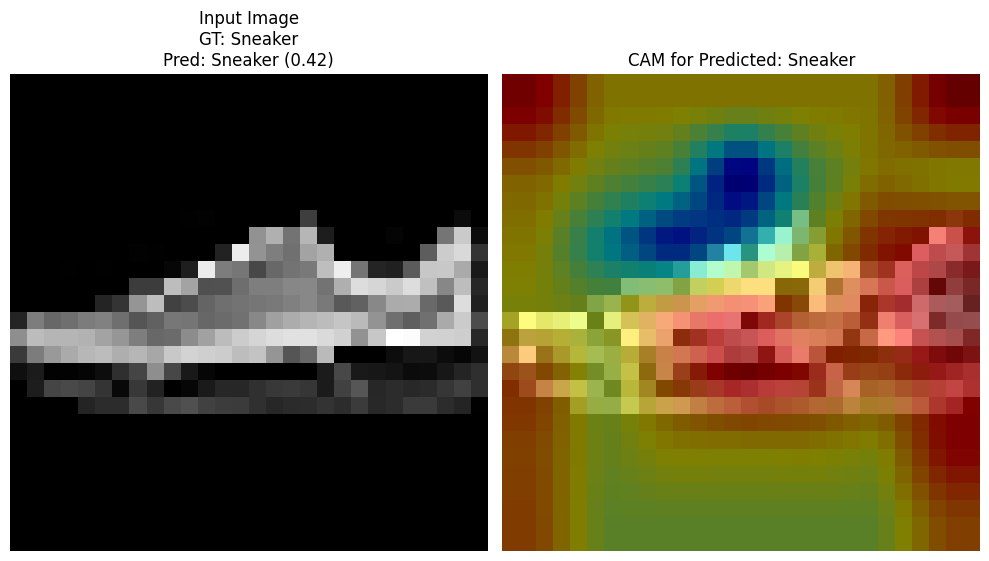

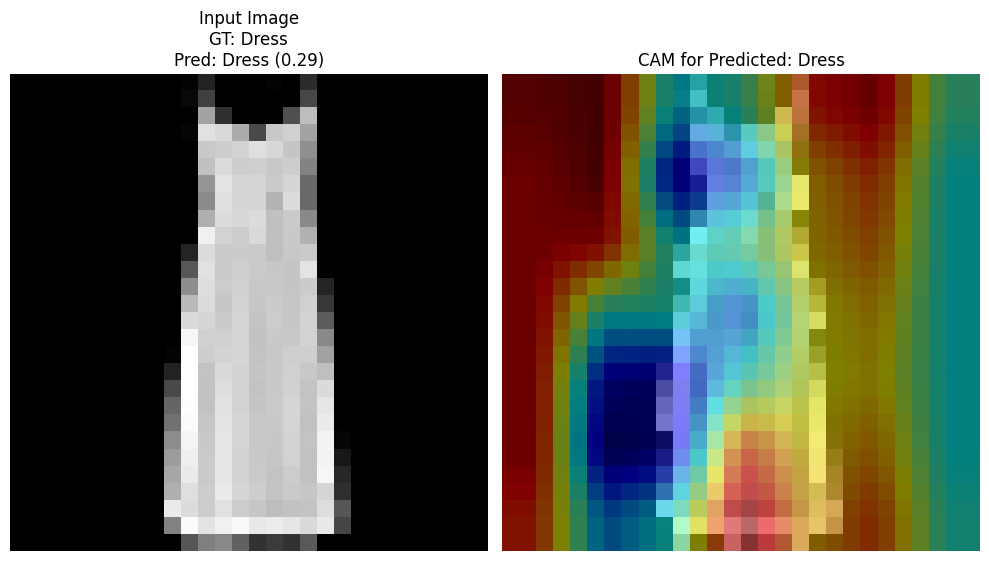

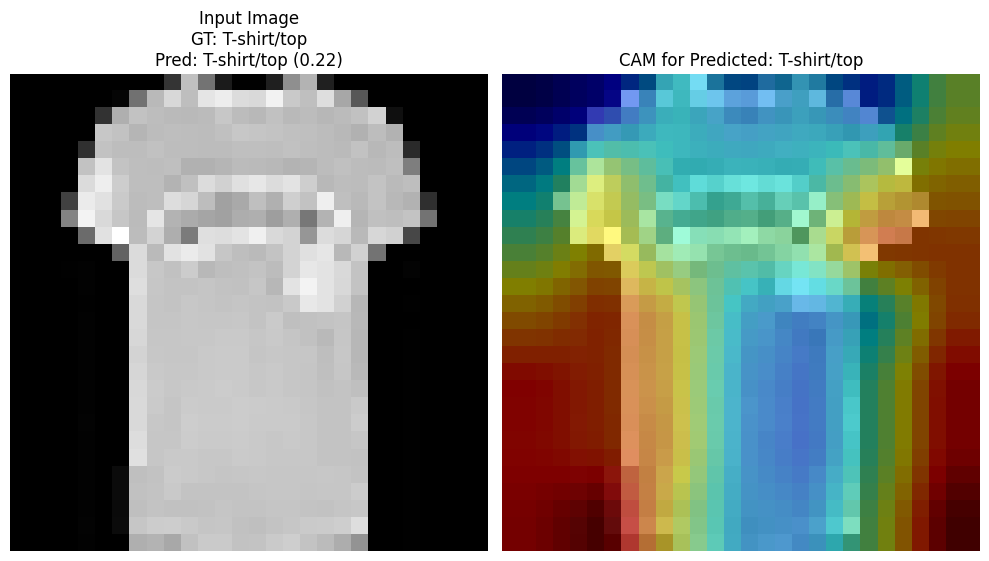

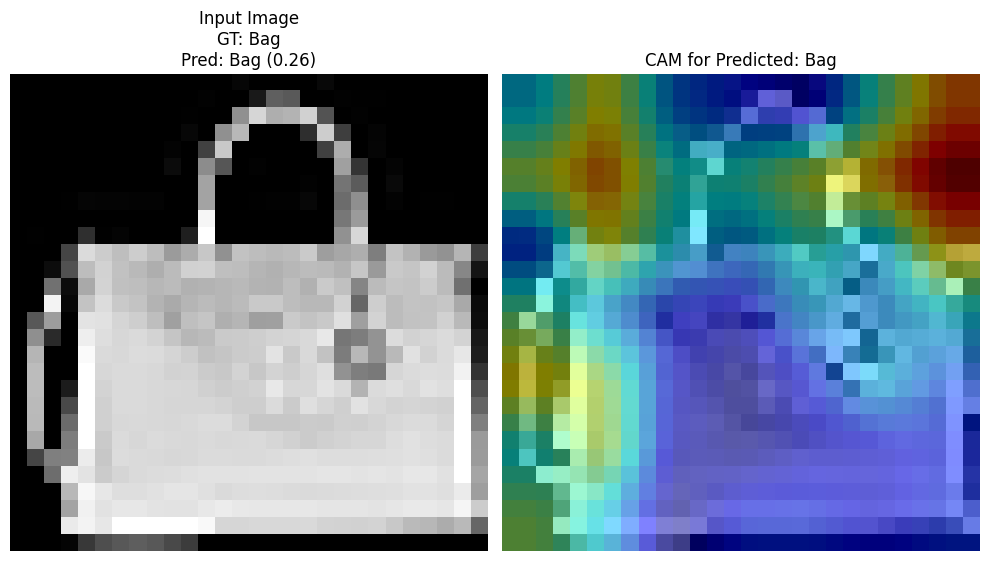

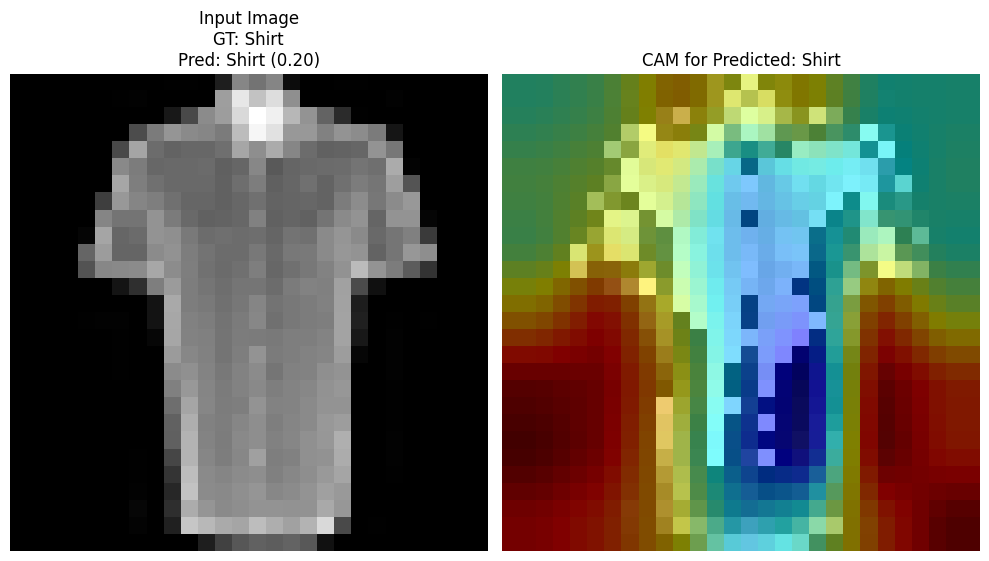

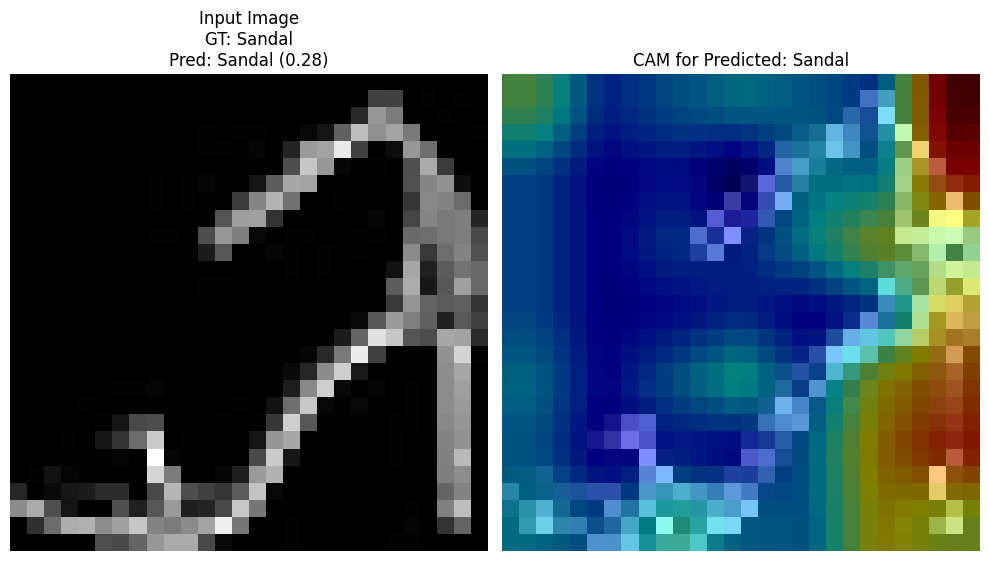

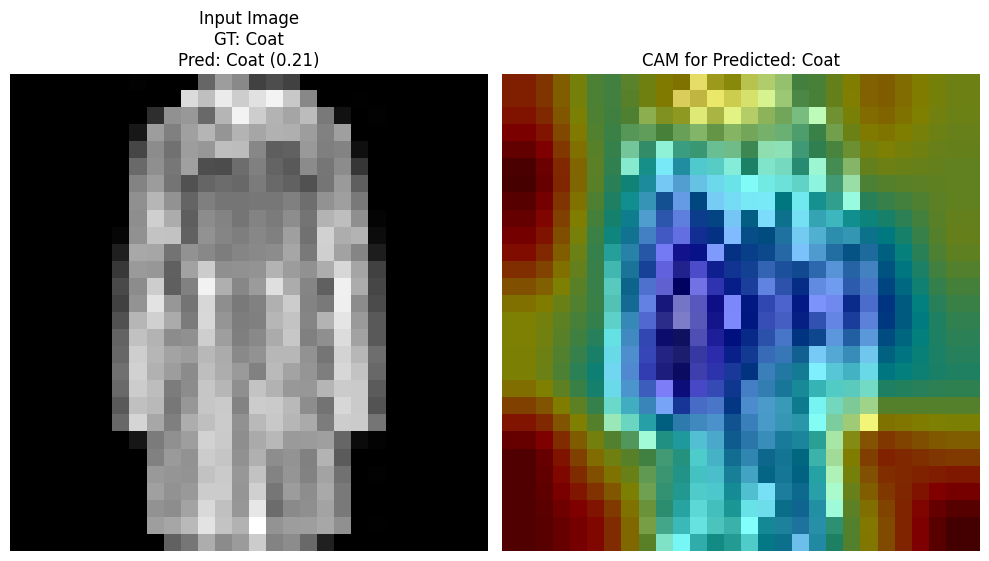

Showing CAMs for 30 incorrect predictions:


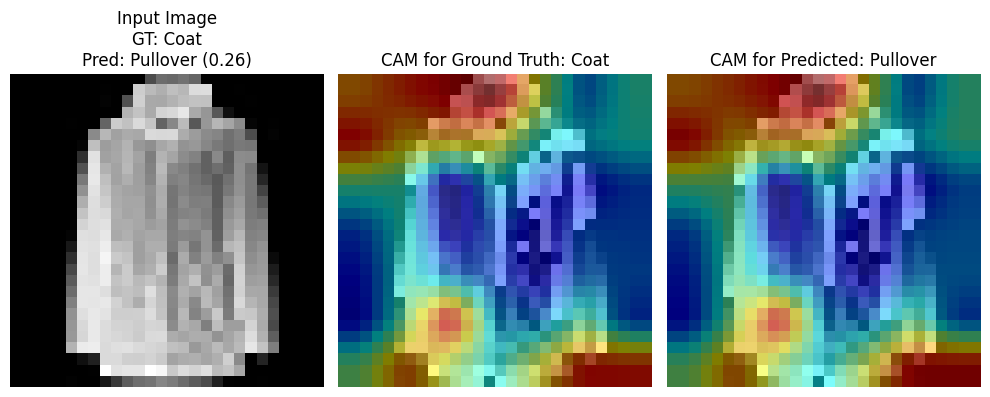

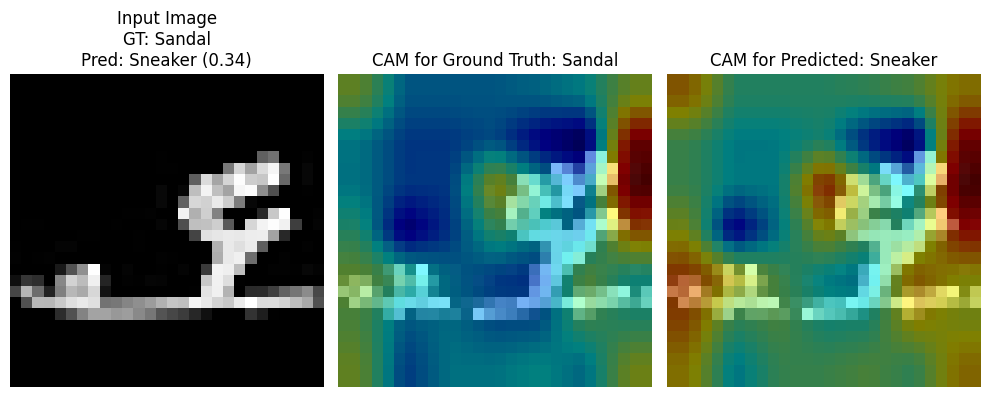

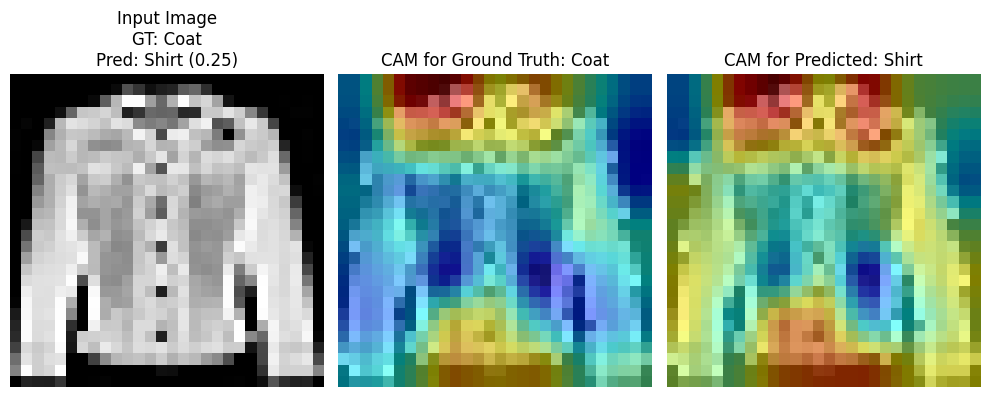

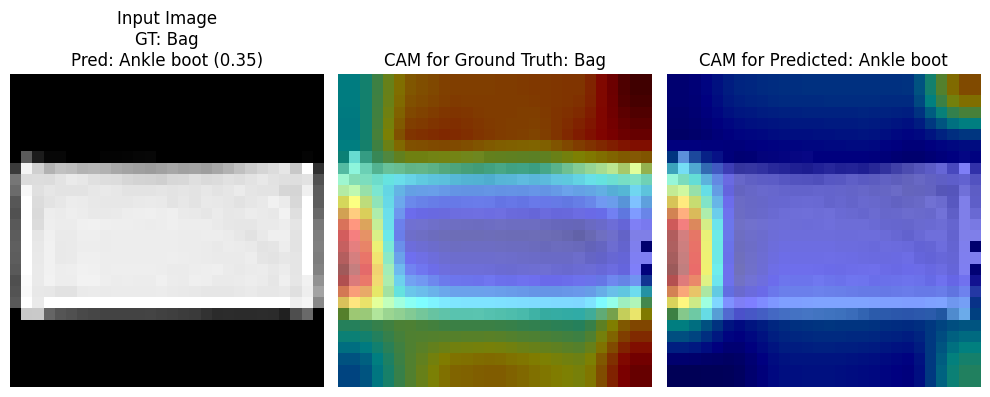

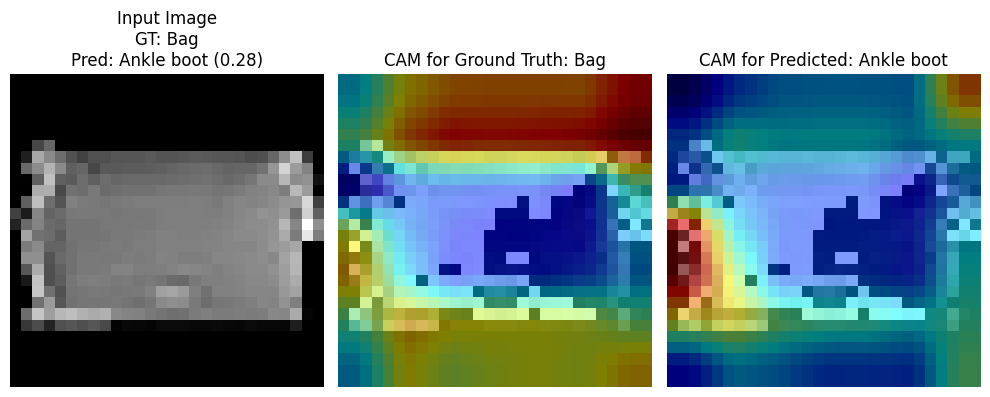

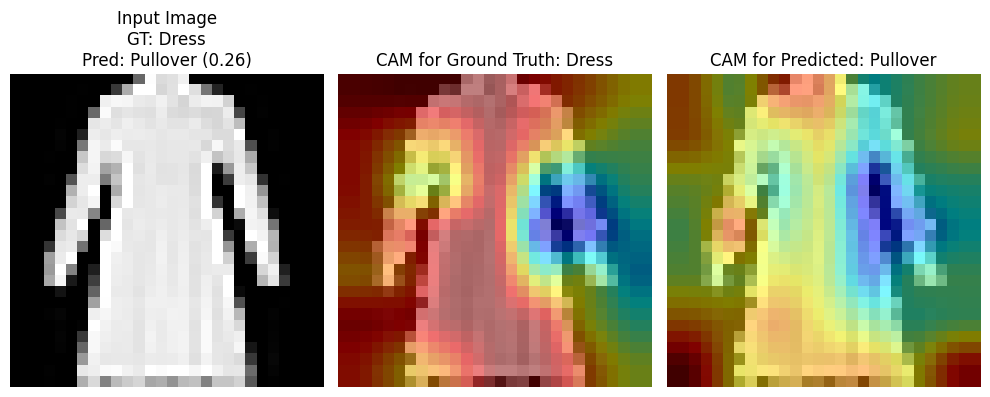

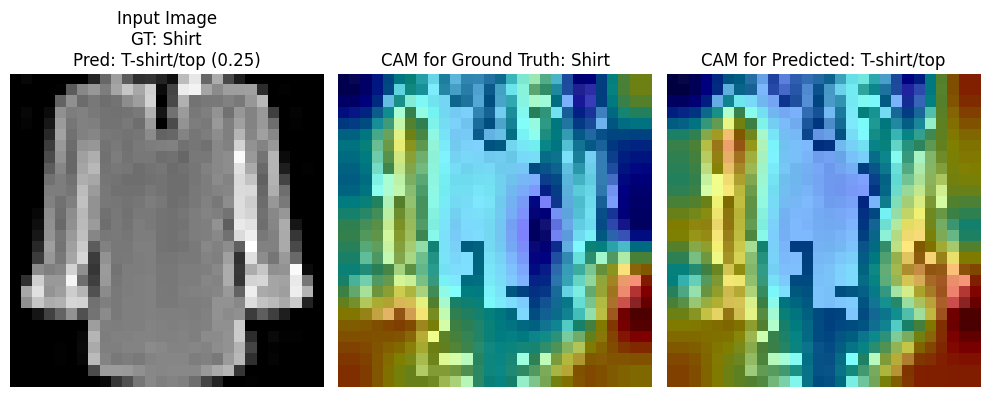

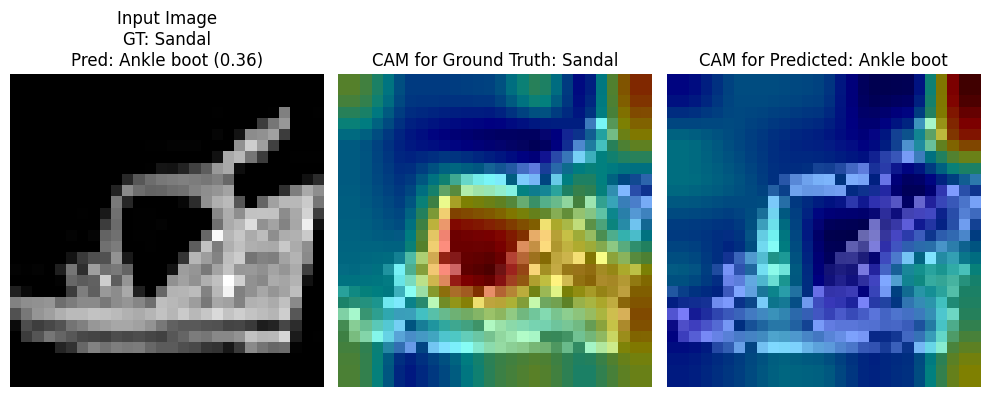

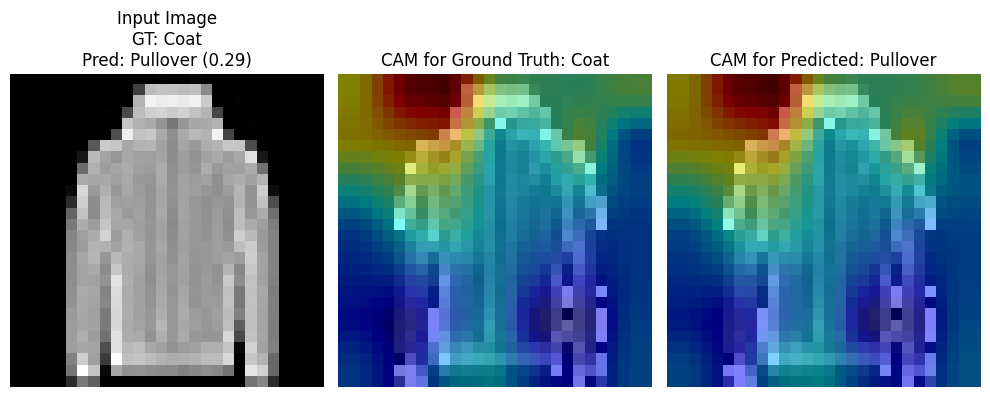

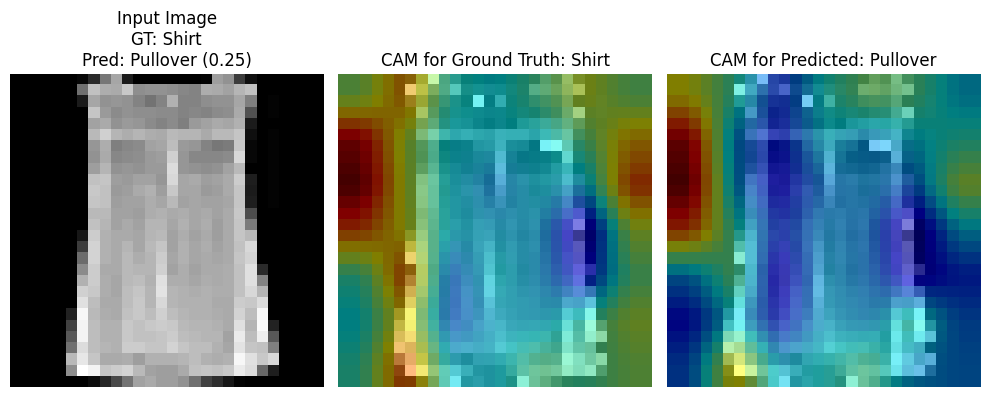

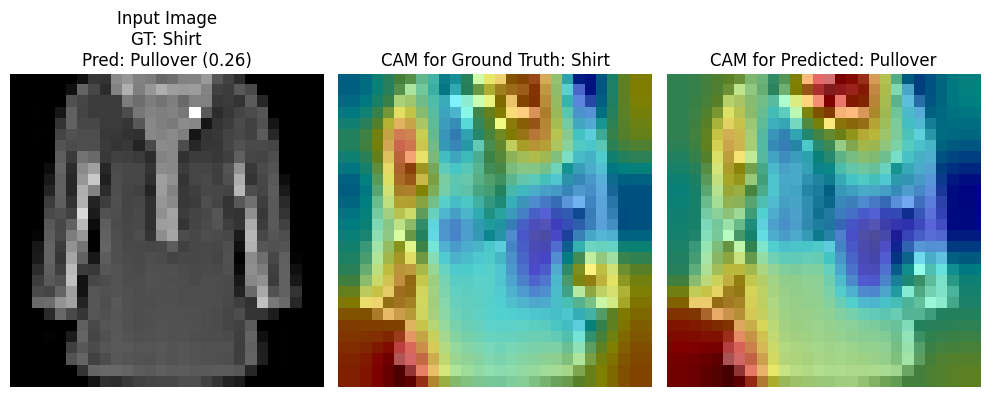

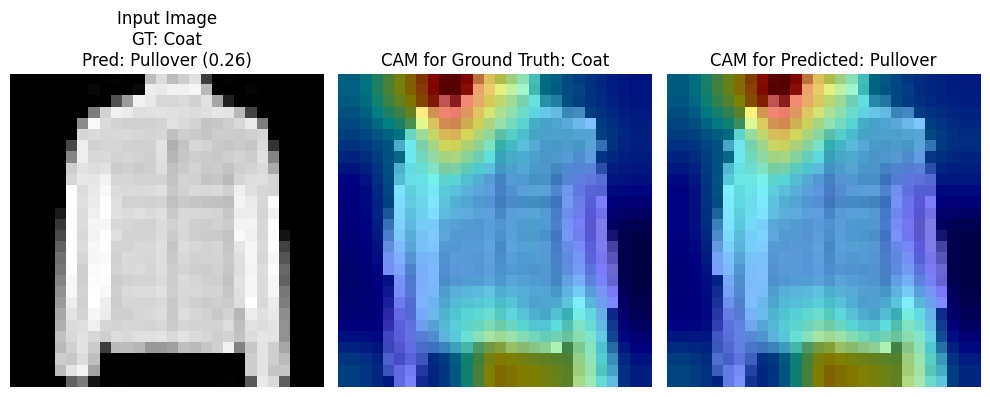

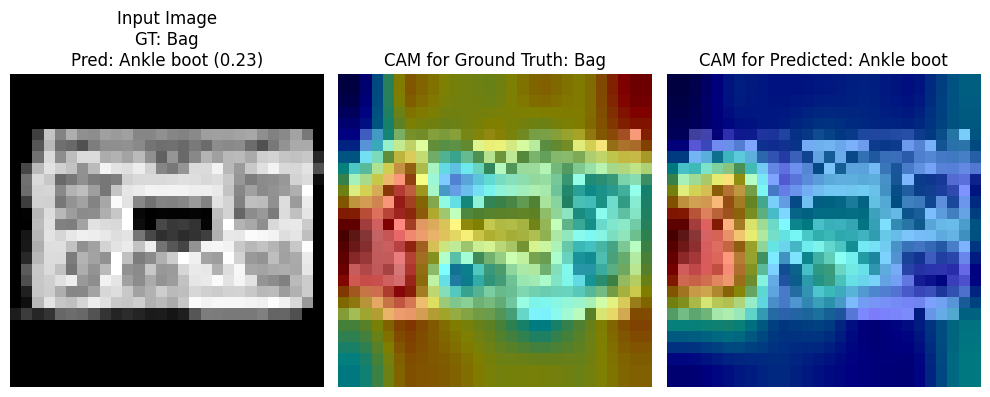

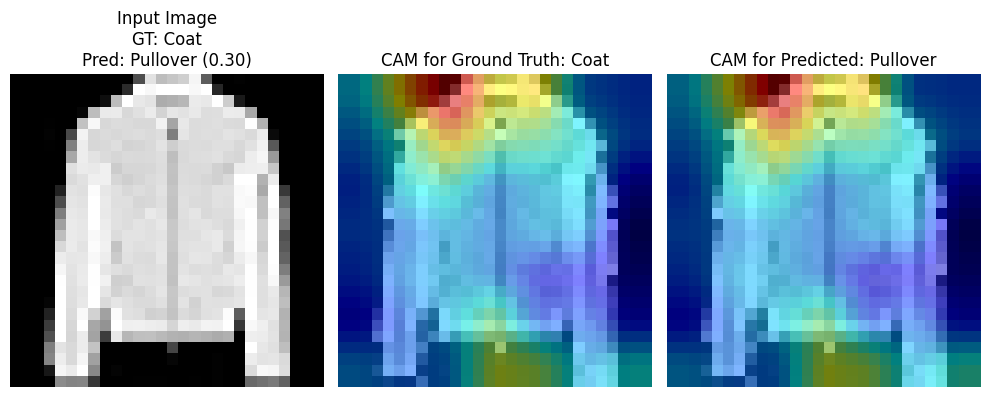

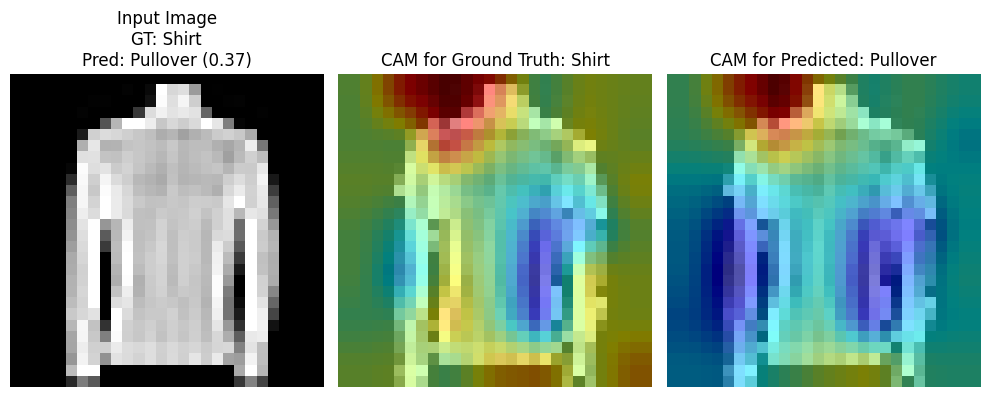

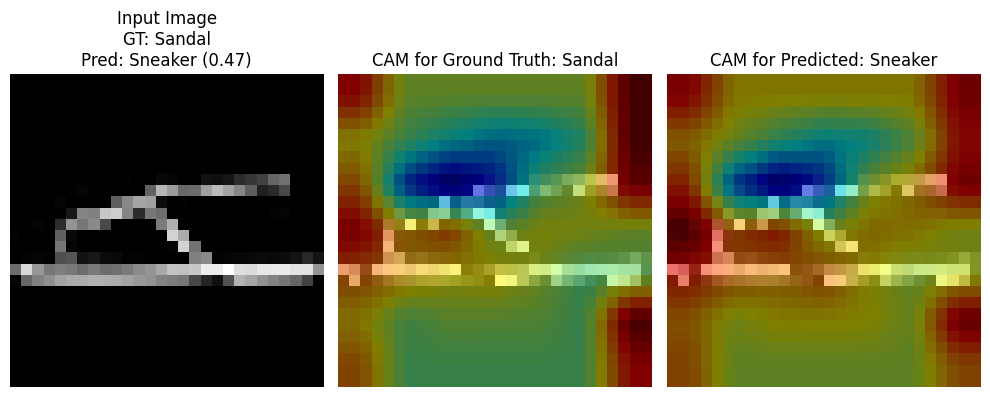

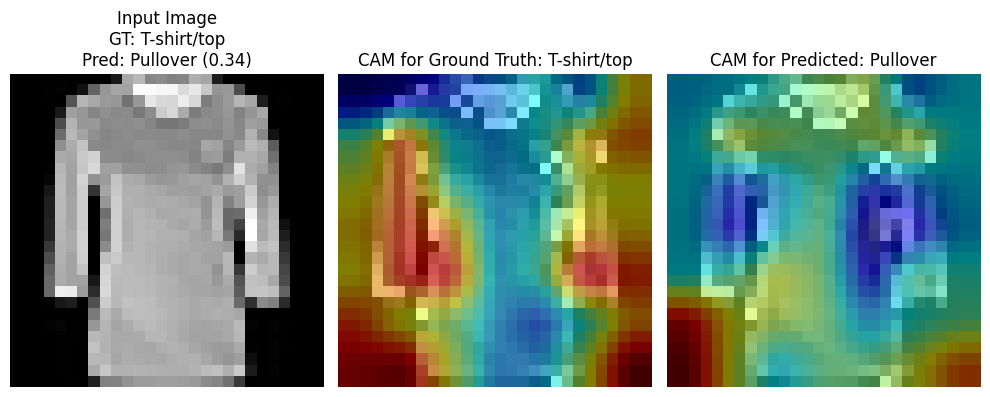

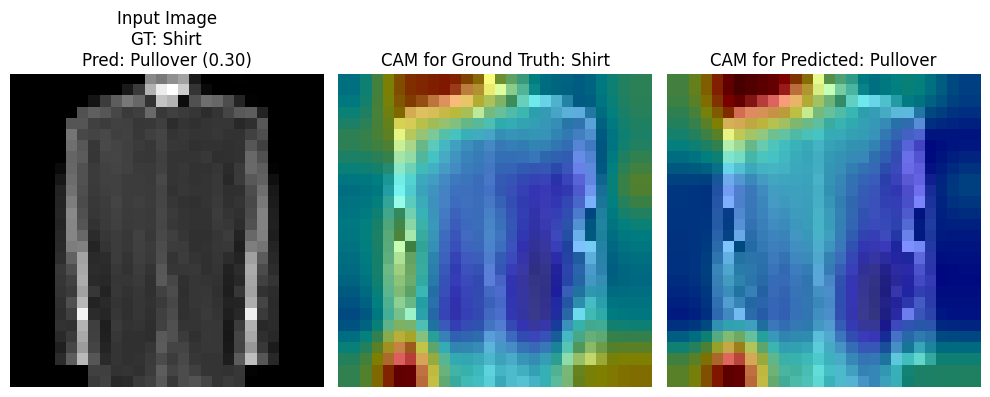

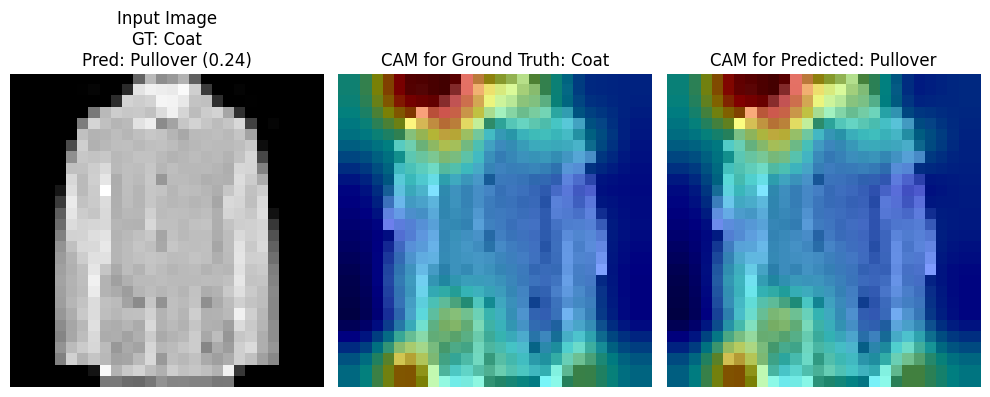

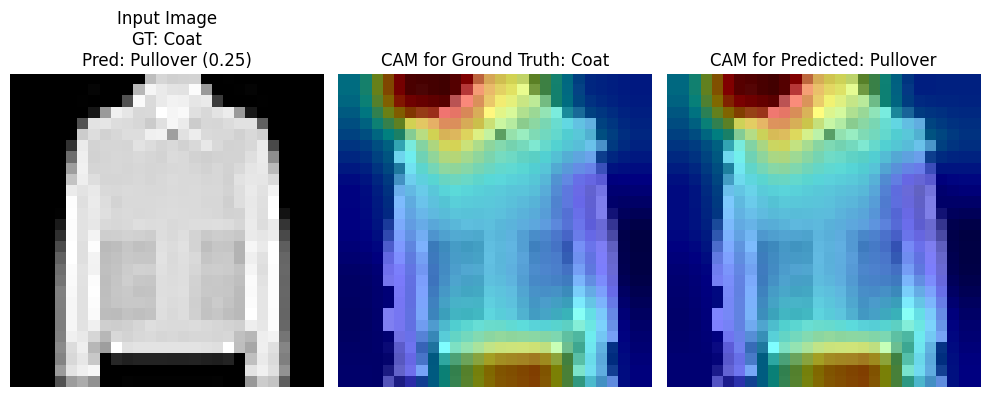

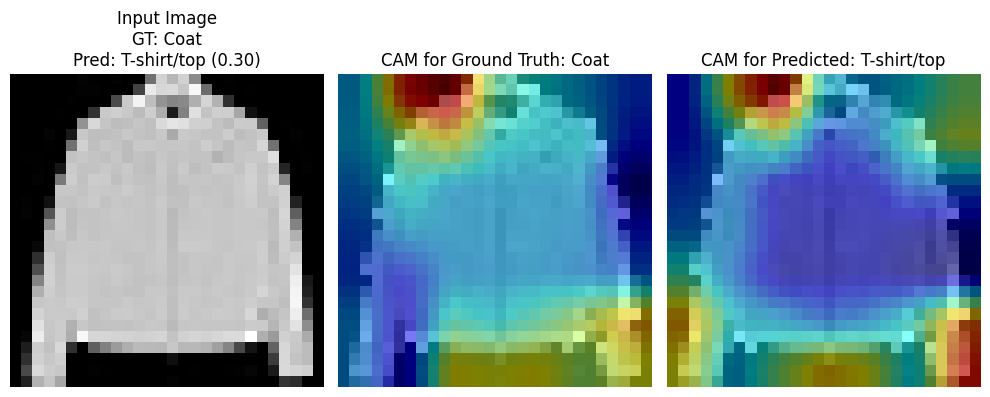

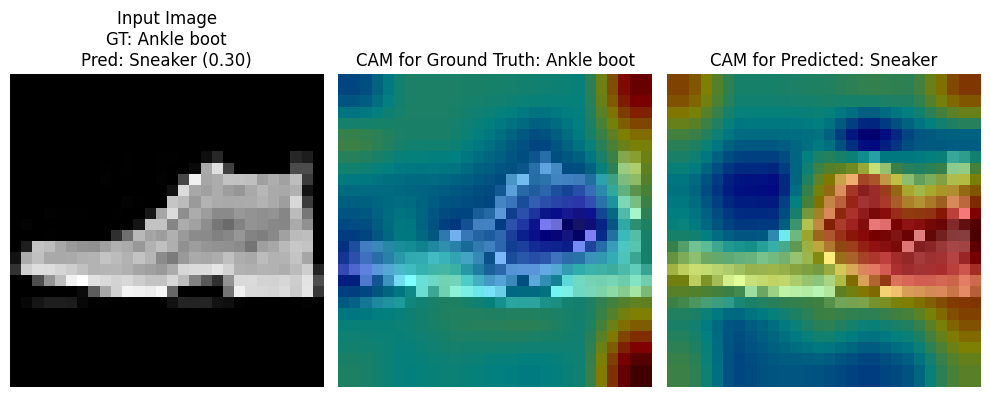

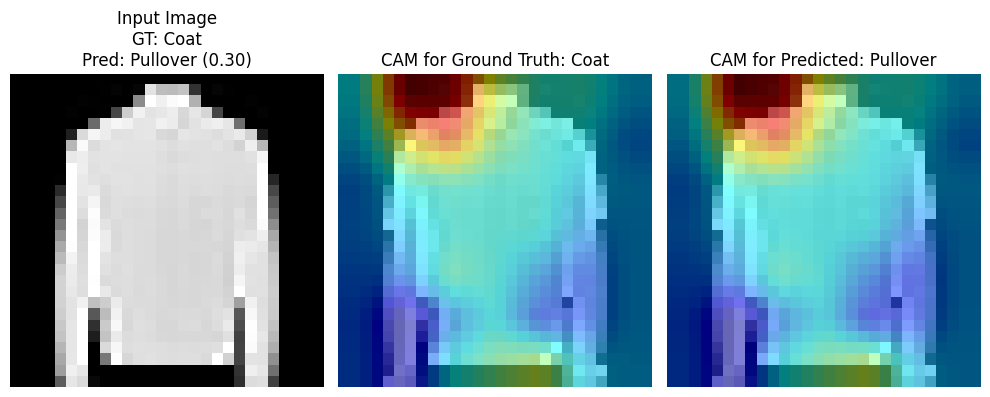

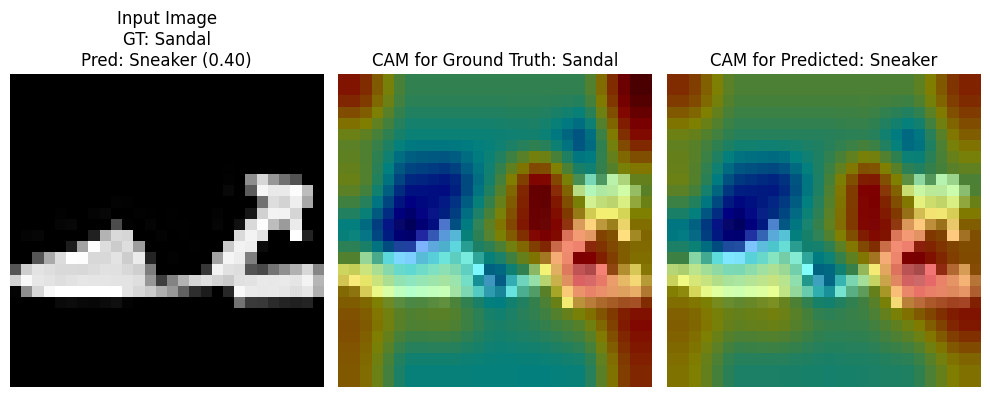

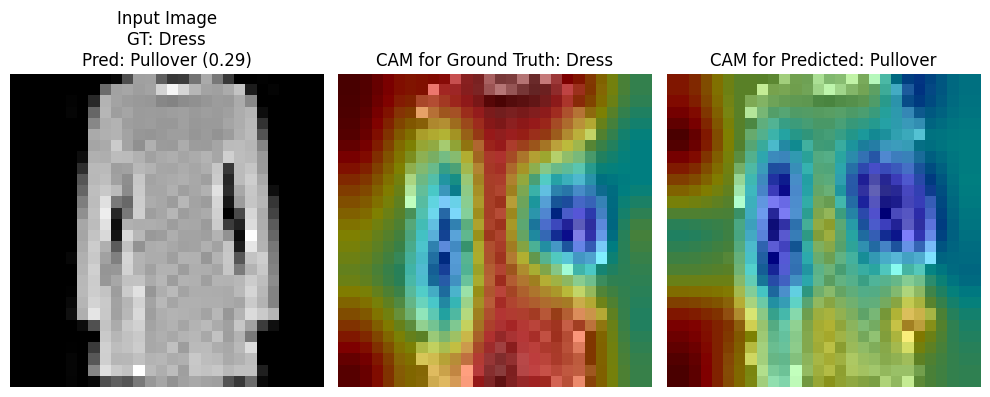

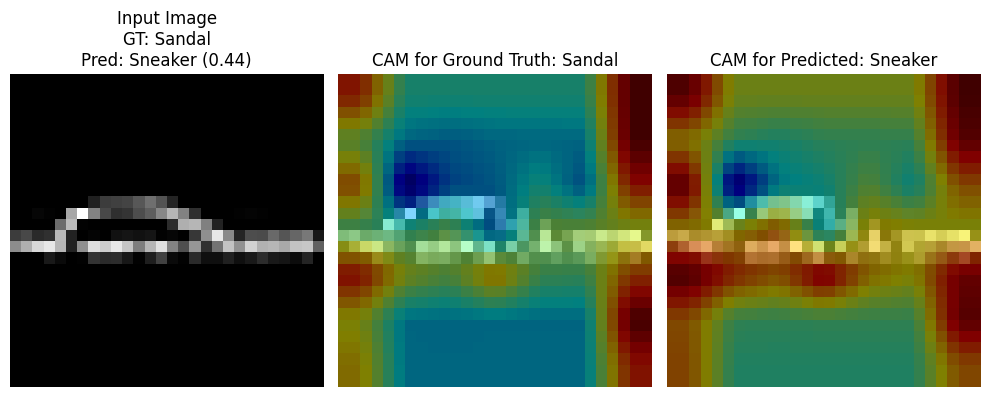

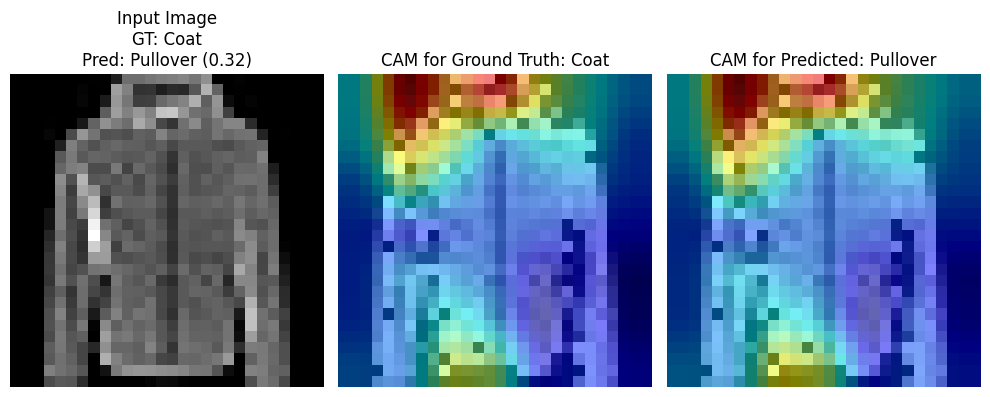

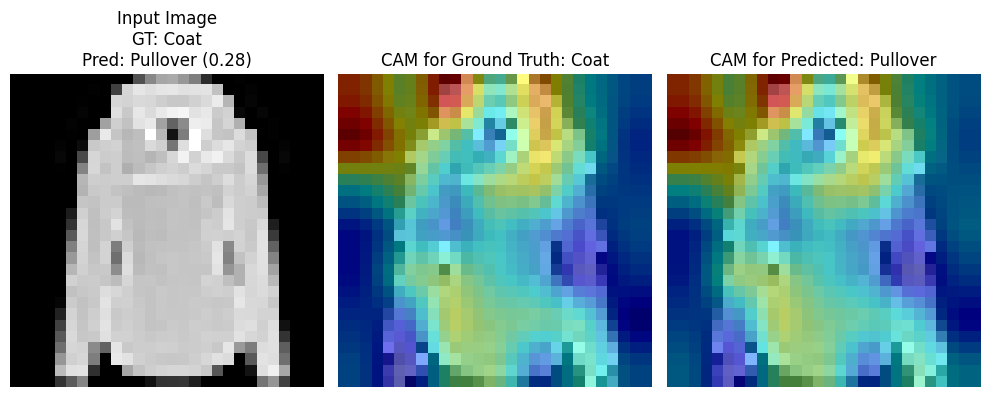

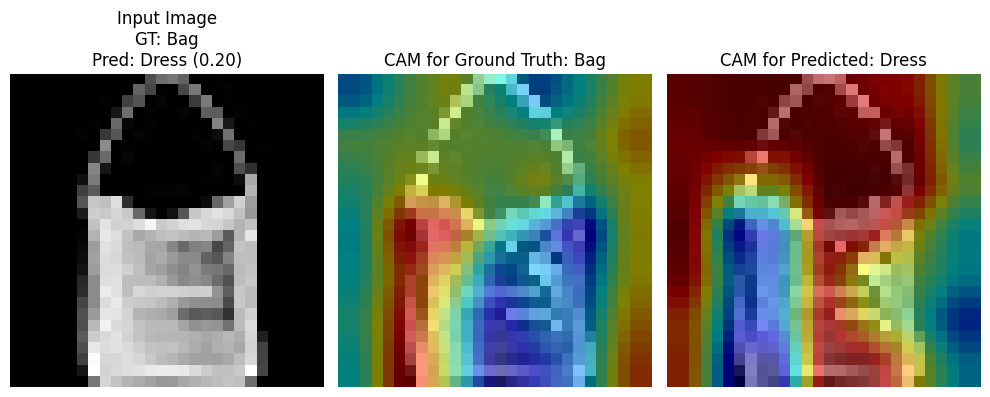

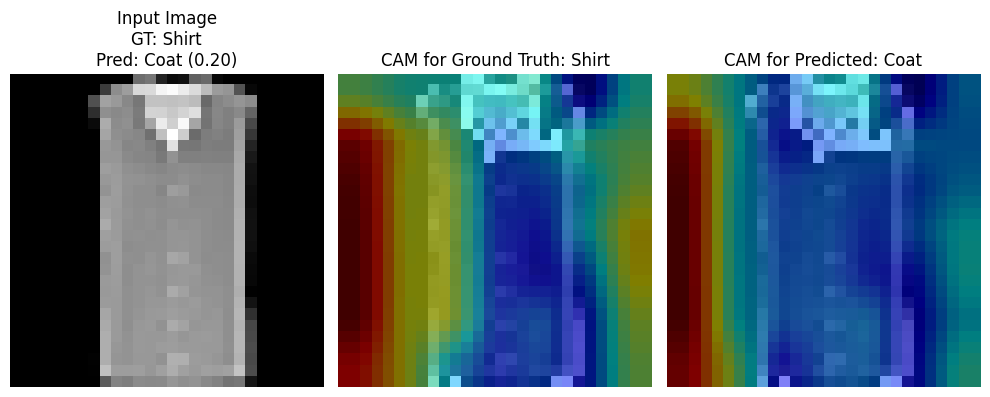

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from tqdm import tqdm
import random
import torch.nn.functional as F
import cv2

# ===========================
# Configuration and Settings
# ===========================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

config = {
    'batch_size': 1024,
    'learning_rate': 0.001,
    'num_epochs': 20,
    'validation_split': 0.2,
    'seed': 42,
    'num_workers': 4,
    'patience': 5,
}

# ===========================
# Data Preparation
# ===========================
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_val_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

train_size = int((1 - config['validation_split']) * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_set, val_set = random_split(
    train_val_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(config['seed'])
)

# For validation set, use test transform
val_set.dataset.transform = transform_test

train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=config['num_workers'],
    pin_memory=True
)

val_loader = DataLoader(
    val_set,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# ===========================
# Model Definition for CAM
# ===========================
class FashionCAM(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCAM, self).__init__()
        # According to given architecture: final shape after last conv block is (7x7x3)
        self.features = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=3, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True),

            nn.Conv2d(3, 5, kernel_size=3, padding=1),
            nn.BatchNorm2d(5),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2),  # 14x14x5

            nn.Conv2d(5, 3, kernel_size=3, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)  # 7x7x3
        )

        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        # Single FC for class logits
        self.fc = nn.Linear(3, num_classes)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        self.last_conv_output = x  # store for CAM generation
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = FashionCAM(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

# ===========================
# Early Stopping
# ===========================
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss improved, saving model ...')
        torch.save(model.state_dict(), self.path)

early_stopping = EarlyStopping(patience=config['patience'], verbose=True)

# ===========================
# Training and Validation
# ===========================
def train_validate(model, criterion, optimizer, num_epochs, train_loader, val_loader, device, early_stopping):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader, desc='Training', leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)

        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

        # Early Stopping
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Load best model
    model.load_state_dict(torch.load(early_stopping.path))

    return {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

history = train_validate(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=config['num_epochs'],
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    early_stopping=early_stopping
)

# ===========================
# Plot Training/Validation Loss
# ===========================
def plot_training_history(history):
    epochs = range(1, len(history['train_losses']) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, history['train_losses'], label='Train Loss')
    plt.plot(epochs, history['val_losses'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

# ===========================
# Evaluation on Test Data
# ===========================
def evaluate_model(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Testing', leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return accuracy, f1, cm

test_accuracy, test_f1, cm = evaluate_model(model, test_loader, device)

# Save the final model
torch.save(model.state_dict(), 'fashion_cnn_modified_for_CAM.pth')
print("Model saved as fashion_cnn_modified_for_CAM.pth")

# ===========================
# CAM Generation Functions
# ===========================

def generate_cam(feature_maps, fc_weights, class_idx):
    """
    Generate a Class Activation Map (CAM).
    feature_maps: (C, H, W) on device (likely GPU)
    fc_weights: (num_classes, C) likely on CPU, need to move it to device
    class_idx: class index
    """
    # Move fc_weights to the same device as feature_maps
    fc_weights = fc_weights.to(feature_maps.device)
    class_weights = fc_weights[class_idx]  # (C)

    # Create cam on the same device
    cam = torch.zeros(feature_maps.shape[1], feature_maps.shape[2], device=feature_maps.device)
    for c in range(feature_maps.shape[0]):
        cam += class_weights[c] * feature_maps[c, :, :]

    # Move cam back to CPU for normalization and visualization
    cam = cam.detach().cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam


def visualize_cam_on_image(img, cam, alpha=0.5):
    """
    Overlays the CAM on the image.
    img: (H,W) numpy grayscale image
    cam: (H,W) CAM heatmap (before resizing)
    """
    # Resize CAM to match img size (28x28)
    H, W = img.shape
    cam_resized = cv2.resize(cam, (W, H), interpolation=cv2.INTER_LINEAR)

    # Convert grayscale to RGB
    img = (img * 255).astype(np.uint8)
    img = np.stack([img, img, img], axis=2)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap * alpha + np.float32(img) / 255 * (1 - alpha)
    overlayed = np.clip(overlayed, 0, 1)
    return (overlayed * 255).astype(np.uint8)

# Extract FC weights
fc_weights = model.fc.weight.data  # shape: (num_classes, 3)

def get_single_image_cam(model, image, label, class_labels):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)  # (1,1,28,28)
        outputs = model(image)
        probs = F.softmax(outputs, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        pred_prob = probs[0, pred_class].item()
        gt_class = label.item()

    # Feature maps (C,H,W)
    feature_maps = model.last_conv_output[0]

    # CAM for predicted class
    cam_pred = generate_cam(feature_maps, fc_weights, pred_class)

    # CAM for ground truth class if needed (when pred != gt)
    cam_gt = generate_cam(feature_maps, fc_weights, gt_class) if gt_class != pred_class else None

    return pred_class, pred_prob, cam_pred, cam_gt

def show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels):
    # Convert image tensor to numpy
    img_np = image.numpy().squeeze()  # shape (28,28)
    plt.figure(figsize=(10, 10))

    if cam_gt is None:
        # For correct predictions: show input image + predicted CAM
        # 1st: input image
        plt.subplot(1, 2, 1)
        plt.imshow(img_np, cmap='gray')
        plt.title(f"Input Image\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        # 2nd: CAM for predicted class
        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 2, 2)
        plt.imshow(overlay_pred)
        plt.title(f"CAM for Predicted: {class_labels[pred_class]}")
        plt.axis('off')

    else:
        # For incorrect predictions: show input image, gt CAM, pred CAM
        # 1st row: input image
        plt.subplot(1, 3, 1)
        plt.imshow(img_np, cmap='gray')
        plt.title(f"Input Image\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        # 2nd: CAM for ground truth class
        overlay_gt = visualize_cam_on_image(img_np, cam_gt)
        plt.subplot(1, 3, 2)
        plt.imshow(overlay_gt)
        plt.title(f"CAM for Ground Truth: {class_labels[label.item()]}")
        plt.axis('off')

        # 3rd: CAM for predicted class
        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 3, 3)
        plt.imshow(overlay_pred)
        plt.title(f"CAM for Predicted: {class_labels[pred_class]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# ===========================
# Select Samples for CAM Visualization
# ===========================
model.eval()
all_images = []
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_images.append(images.cpu())
        all_labels.append(labels.cpu())
        all_preds.append(preds.cpu())

all_images = torch.cat(all_images)
all_labels = torch.cat(all_labels)
all_preds = torch.cat(all_preds)

correct_idx = (all_preds == all_labels)
incorrect_idx = (all_preds != all_labels)

correct_images = all_images[correct_idx]
correct_labels = all_labels[correct_idx]
correct_preds = all_preds[correct_idx]

incorrect_images = all_images[incorrect_idx]
incorrect_labels = all_labels[incorrect_idx]
incorrect_preds = all_preds[incorrect_idx]

# For the 10 correct predictions (one from each class)
picked_correct = []
class_found = set()
for i in range(len(correct_images)):
    c = correct_labels[i].item()
    if c not in class_found:
        picked_correct.append(i)
        class_found.add(c)
    if len(class_found) == 10:
        break

# For the 30 incorrect predictions
if len(incorrect_images) > 30:
    picked_incorrect = np.random.choice(range(len(incorrect_images)), size=30, replace=False)
else:
    # If there are less than 30 incorrect predictions (unlikely), just use all
    picked_incorrect = range(len(incorrect_images))

print("Showing CAMs for 10 correct predictions (one from each class):")
for idx in picked_correct:
    image = correct_images[idx]
    label = correct_labels[idx]
    pred_class, pred_prob, cam_pred, _ = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, None, class_labels)

print("Showing CAMs for 30 incorrect predictions:")
count = 0
for idx in picked_incorrect:
    image = incorrect_images[idx]
    label = incorrect_labels[idx]
    pred_class, pred_prob, cam_pred, cam_gt = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels)
    count += 1
    if count >= 30:
        break


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cuda
Epoch 1/30
----------


Train Loss: 1.0173, Train Acc: 70.15%
Val Loss: 0.8263, Val Acc: 72.73%
Validation loss improved, saving model ...
Epoch 2/30
----------


Train Loss: 0.5797, Train Acc: 81.73%
Val Loss: 0.6414, Val Acc: 78.44%
Validation loss improved, saving model ...
Epoch 3/30
----------


Train Loss: 0.4799, Train Acc: 84.41%
Val Loss: 0.5000, Val Acc: 82.69%
Validation loss improved, saving model ...
Epoch 4/30
----------


Train Loss: 0.4303, Train Acc: 85.57%
Val Loss: 0.4880, Val Acc: 83.58%
Validation loss improved, saving model ...
Epoch 5/30
----------


Train Loss: 0.3964, Train Acc: 86.58%
Val Loss: 0.5030, Val Acc: 81.08%
EarlyStopping counter: 1 out of 7
Epoch 6/30
----------


Train Loss: 0.3665, Train Acc: 87.82%
Val Loss: 0.6345, Val Acc: 77.31%
EarlyStopping counter: 2 out of 7
Epoch 7/30
----------


Train Loss: 0.3511, Train Acc: 88.15%
Val Loss: 0.5179, Val Acc: 82.60%
EarlyStopping counter: 3 out of 7
Epoch 8/30
----------


Train Loss: 0.3330, Train Acc: 88.87%
Val Loss: 0.4676, Val Acc: 82.98%
Validation loss improved, saving model ...
Epoch 9/30
----------


Train Loss: 0.3171, Train Acc: 89.24%
Val Loss: 0.4013, Val Acc: 86.04%
Validation loss improved, saving model ...
Epoch 10/30
----------


Train Loss: 0.3045, Train Acc: 89.70%
Val Loss: 0.6589, Val Acc: 78.95%
EarlyStopping counter: 1 out of 7
Epoch 11/30
----------


Train Loss: 0.2921, Train Acc: 90.08%
Val Loss: 0.4073, Val Acc: 85.47%
EarlyStopping counter: 2 out of 7
Epoch 12/30
----------


Train Loss: 0.2879, Train Acc: 90.17%
Val Loss: 0.4920, Val Acc: 83.27%
EarlyStopping counter: 3 out of 7
Epoch 13/30
----------


Train Loss: 0.2760, Train Acc: 90.64%
Val Loss: 0.4808, Val Acc: 82.50%
EarlyStopping counter: 4 out of 7
Epoch 14/30
----------


Train Loss: 0.2457, Train Acc: 91.81%
Val Loss: 0.2918, Val Acc: 89.63%
Validation loss improved, saving model ...
Epoch 15/30
----------


Train Loss: 0.2389, Train Acc: 92.14%
Val Loss: 0.2891, Val Acc: 89.83%
Validation loss improved, saving model ...
Epoch 16/30
----------


Train Loss: 0.2369, Train Acc: 92.20%
Val Loss: 0.2949, Val Acc: 89.45%
EarlyStopping counter: 1 out of 7
Epoch 17/30
----------


Train Loss: 0.2352, Train Acc: 92.27%
Val Loss: 0.2891, Val Acc: 89.71%
Validation loss improved, saving model ...
Epoch 18/30
----------


Train Loss: 0.2334, Train Acc: 92.34%
Val Loss: 0.2800, Val Acc: 90.43%
Validation loss improved, saving model ...
Epoch 19/30
----------


Train Loss: 0.2324, Train Acc: 92.42%
Val Loss: 0.2851, Val Acc: 89.90%
EarlyStopping counter: 1 out of 7
Epoch 20/30
----------


Train Loss: 0.2308, Train Acc: 92.47%
Val Loss: 0.2866, Val Acc: 89.76%
EarlyStopping counter: 2 out of 7
Epoch 21/30
----------


Train Loss: 0.2292, Train Acc: 92.44%
Val Loss: 0.2875, Val Acc: 89.88%
EarlyStopping counter: 3 out of 7
Epoch 22/30
----------


Train Loss: 0.2289, Train Acc: 92.52%
Val Loss: 0.2916, Val Acc: 89.47%
EarlyStopping counter: 4 out of 7
Epoch 23/30
----------


Train Loss: 0.2240, Train Acc: 92.64%
Val Loss: 0.2764, Val Acc: 90.23%
Validation loss improved, saving model ...
Epoch 24/30
----------


Train Loss: 0.2232, Train Acc: 92.67%
Val Loss: 0.2760, Val Acc: 90.22%
Validation loss improved, saving model ...
Epoch 25/30
----------


Train Loss: 0.2228, Train Acc: 92.80%
Val Loss: 0.2761, Val Acc: 90.22%
EarlyStopping counter: 1 out of 7
Epoch 26/30
----------


Train Loss: 0.2230, Train Acc: 92.72%
Val Loss: 0.2766, Val Acc: 90.16%
EarlyStopping counter: 2 out of 7
Epoch 27/30
----------


Train Loss: 0.2229, Train Acc: 92.69%
Val Loss: 0.2759, Val Acc: 90.34%
Validation loss improved, saving model ...
Epoch 28/30
----------


Train Loss: 0.2223, Train Acc: 92.76%
Val Loss: 0.2767, Val Acc: 90.20%
EarlyStopping counter: 1 out of 7
Epoch 29/30
----------


Train Loss: 0.2224, Train Acc: 92.79%
Val Loss: 0.2760, Val Acc: 90.28%
EarlyStopping counter: 2 out of 7
Epoch 30/30
----------


<ipython-input-4-c74113468549>:266: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(early_stopping.path))


Train Loss: 0.2222, Train Acc: 92.74%
Val Loss: 0.2759, Val Acc: 90.24%
EarlyStopping counter: 3 out of 7


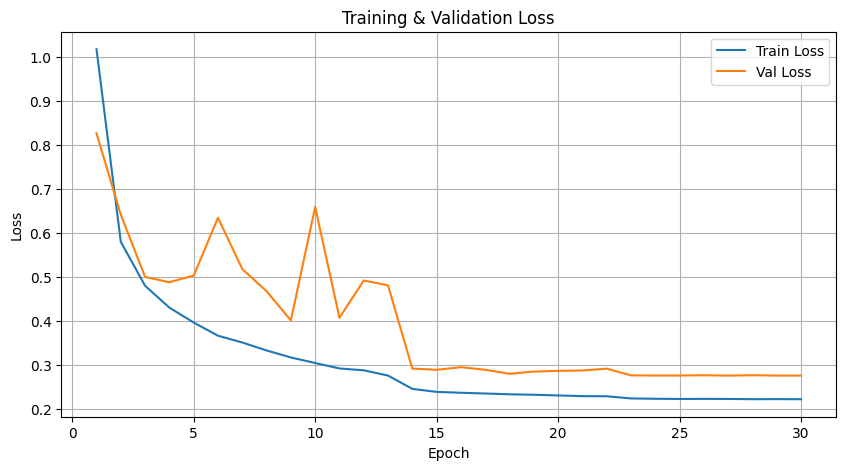

Test Accuracy: 90.25%
Test F1 Score: 0.9024


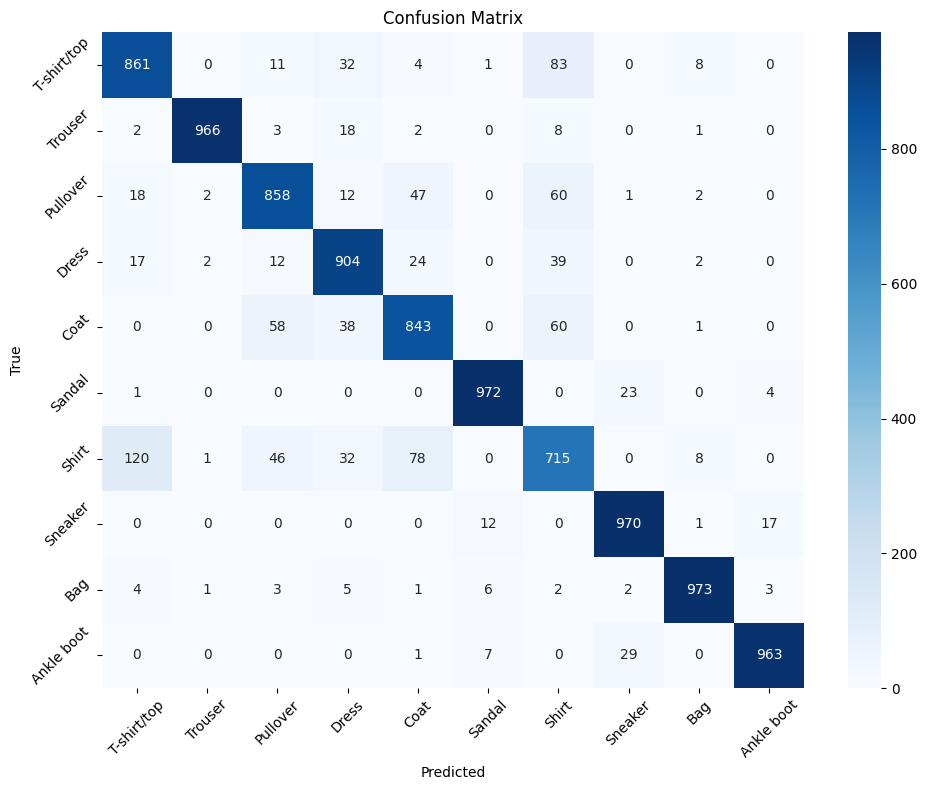

Model saved as fashion_cnn_modified_for_CAM.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Showing CAMs for 10 correct predictions (one from each class):


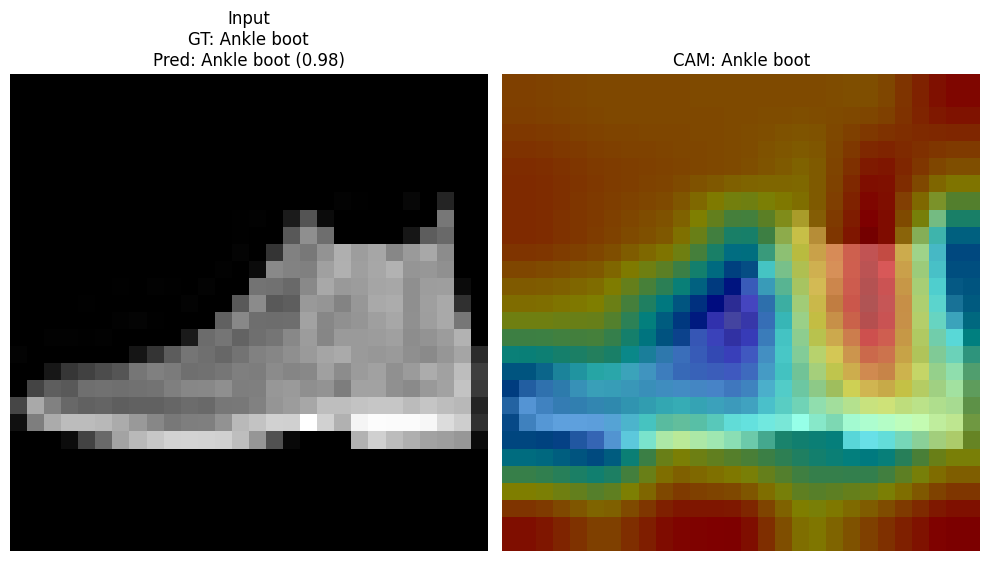

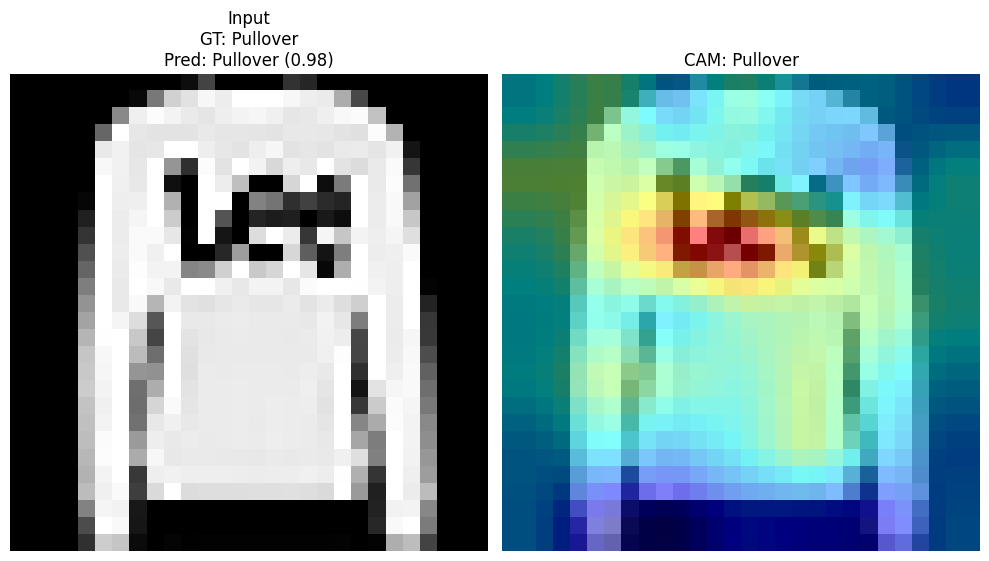

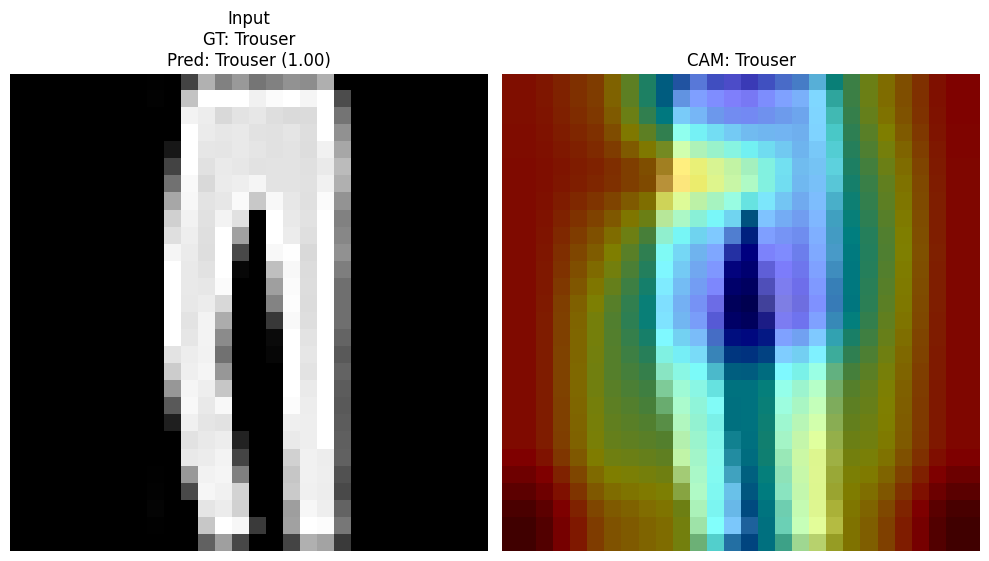

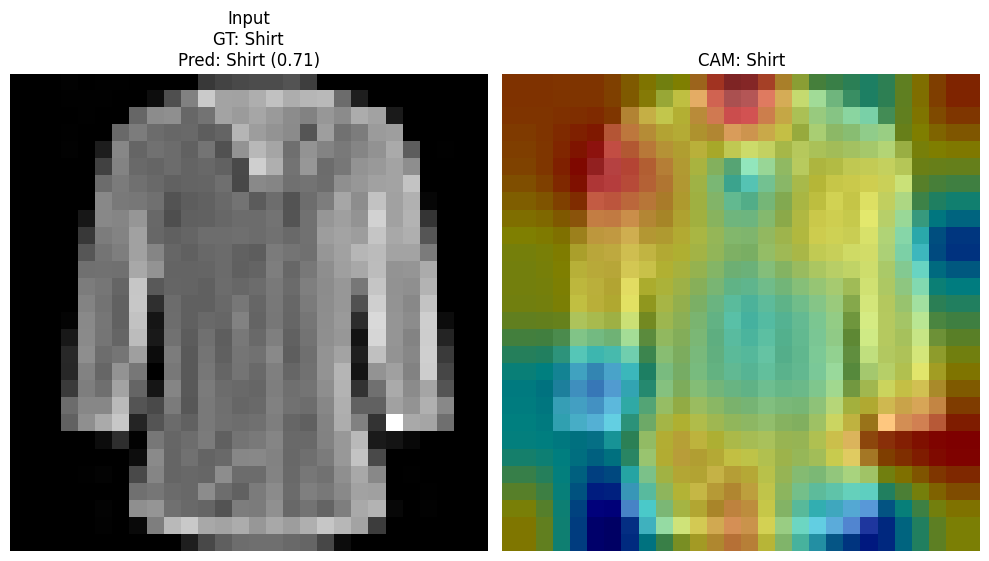

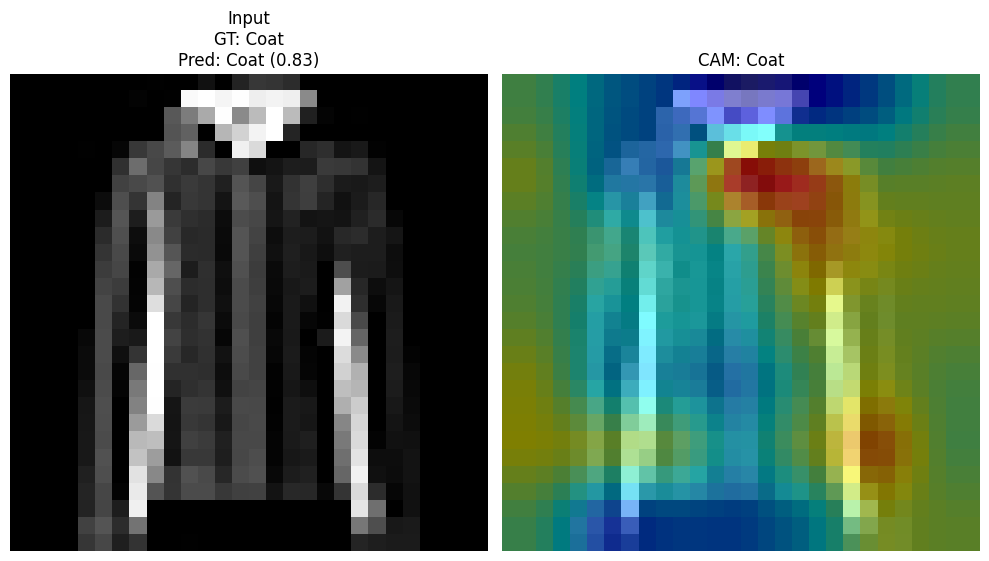

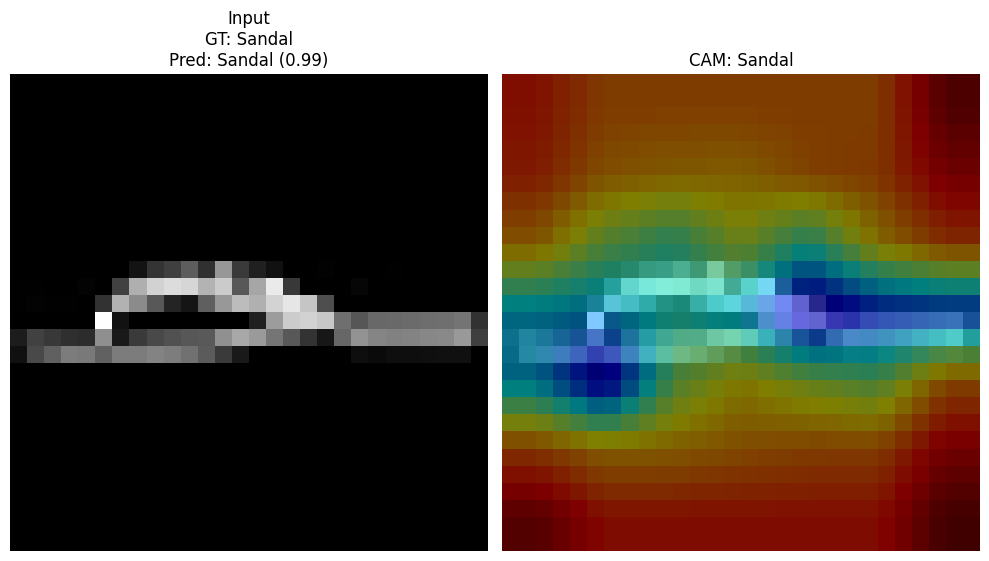

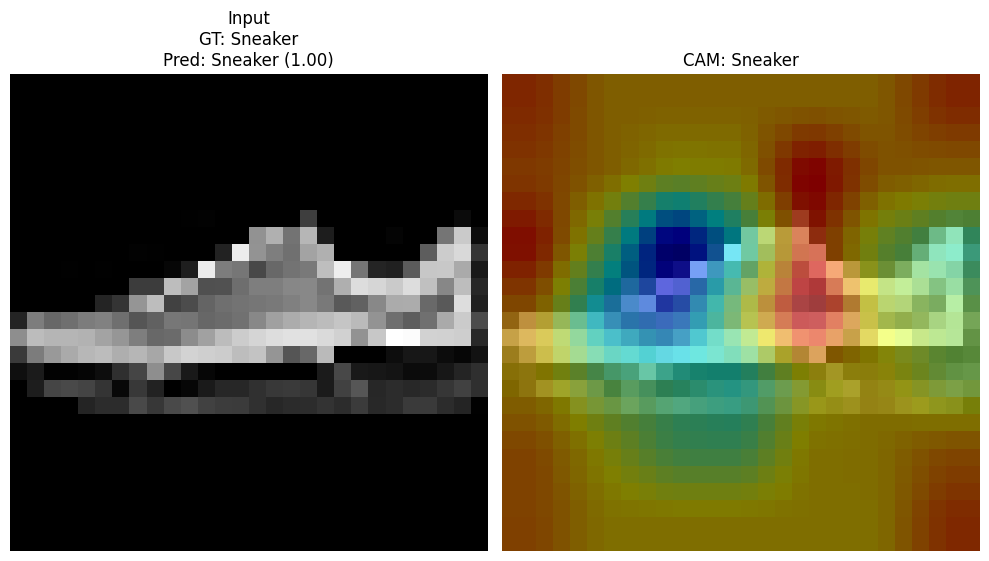

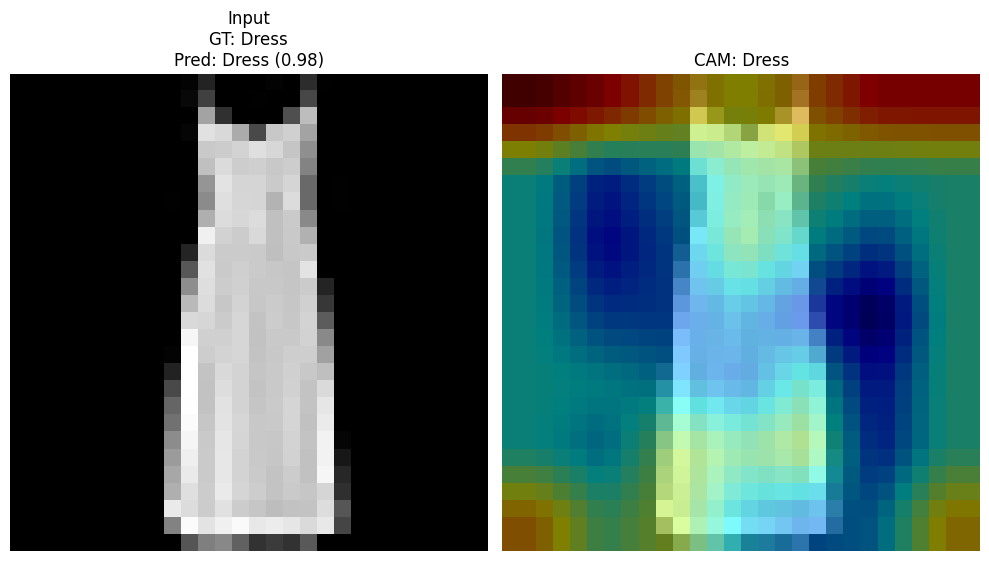

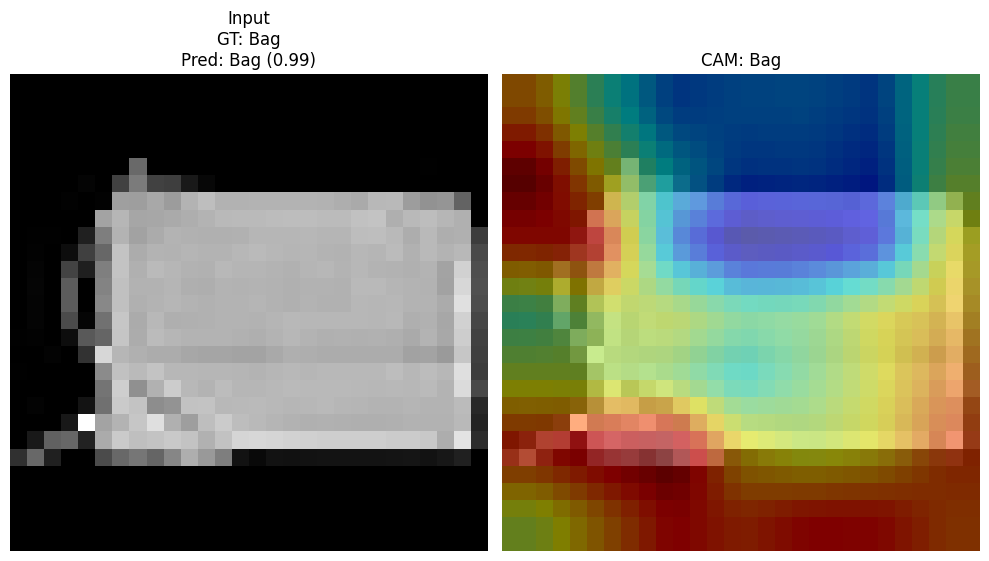

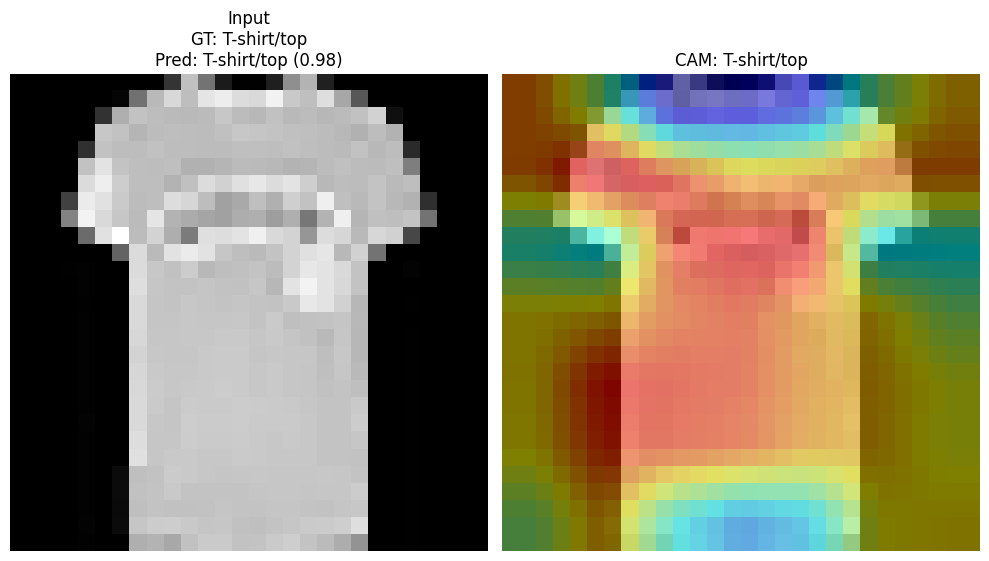

Showing CAMs for 30 incorrect predictions:


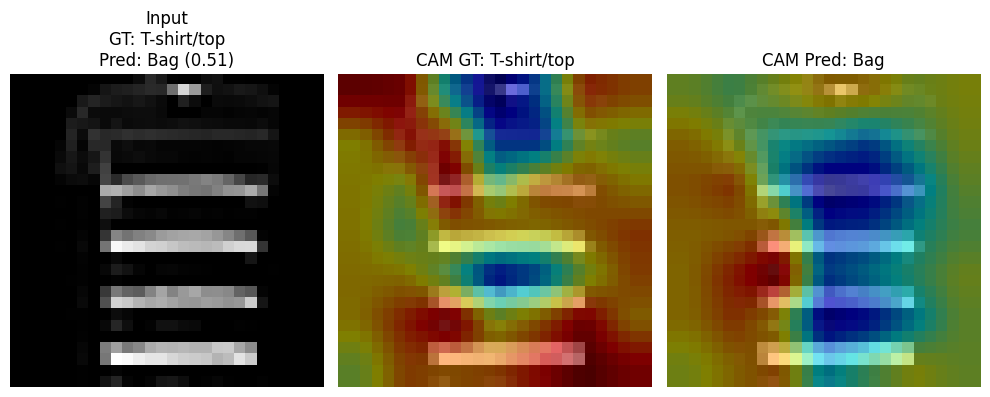

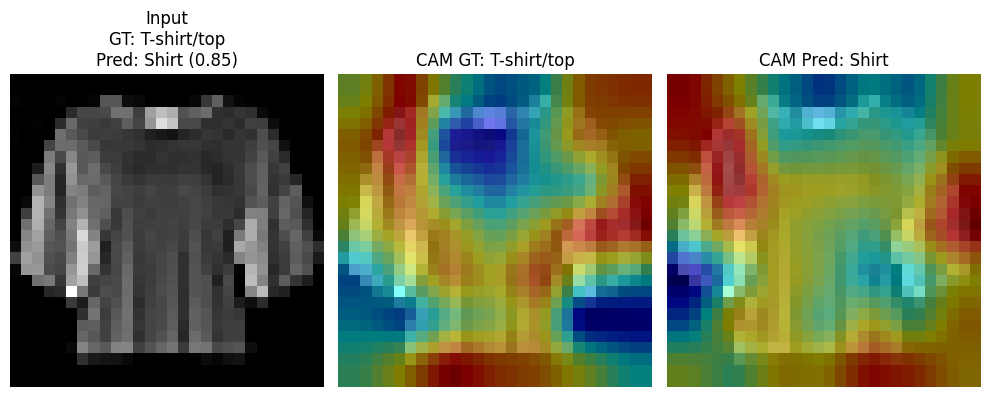

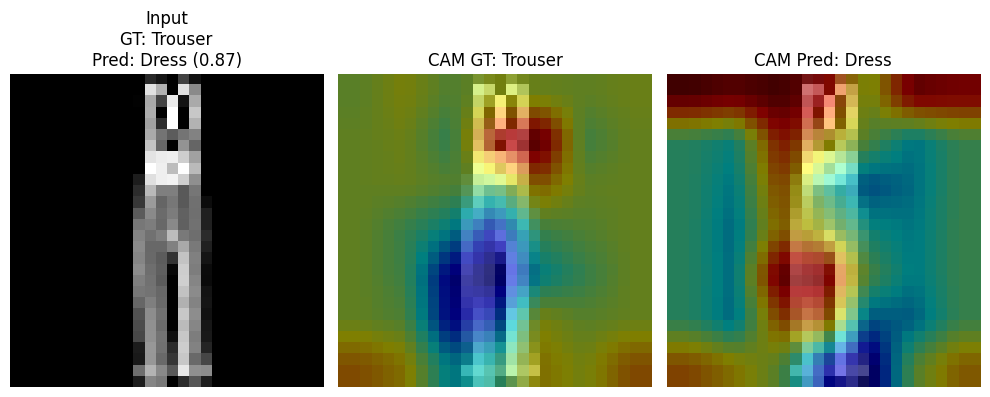

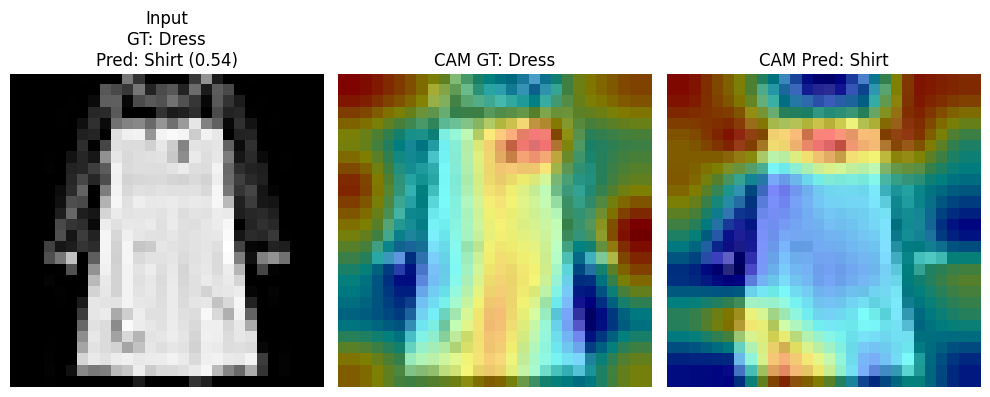

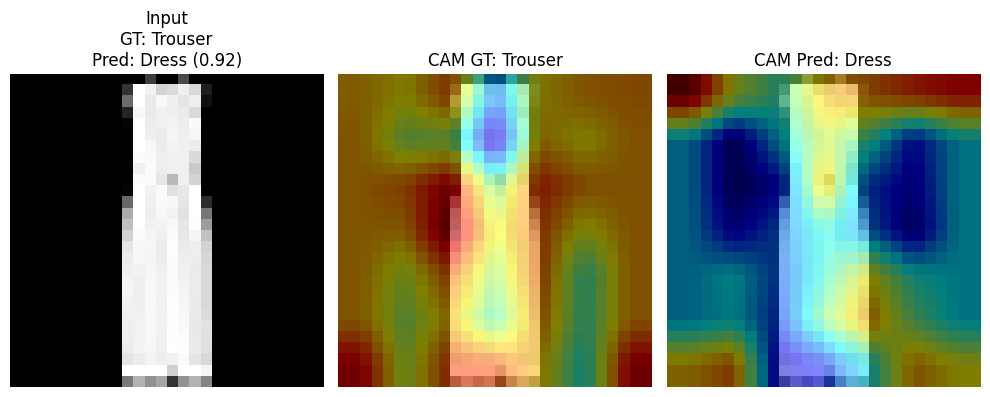

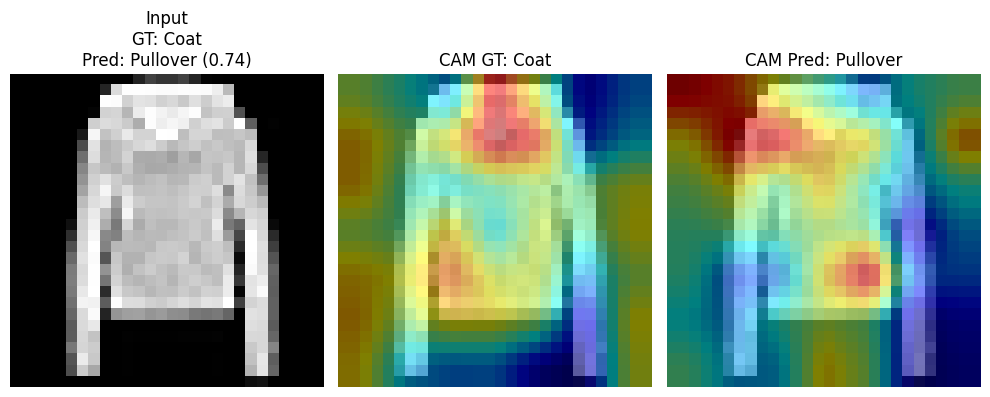

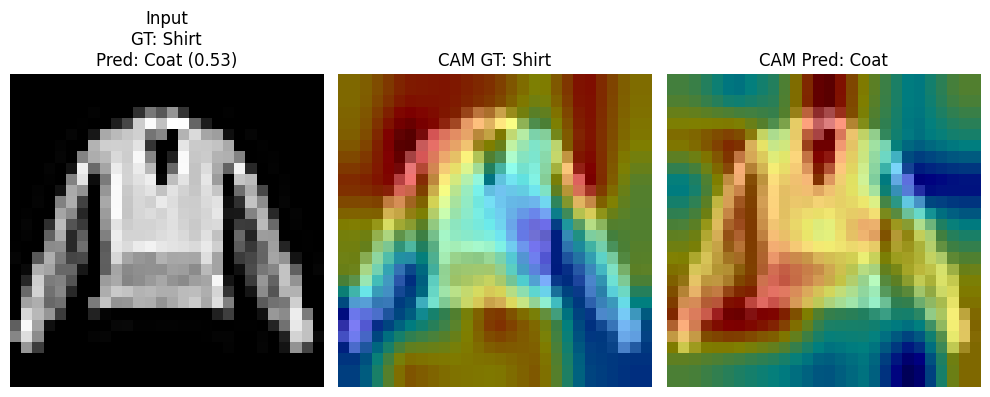

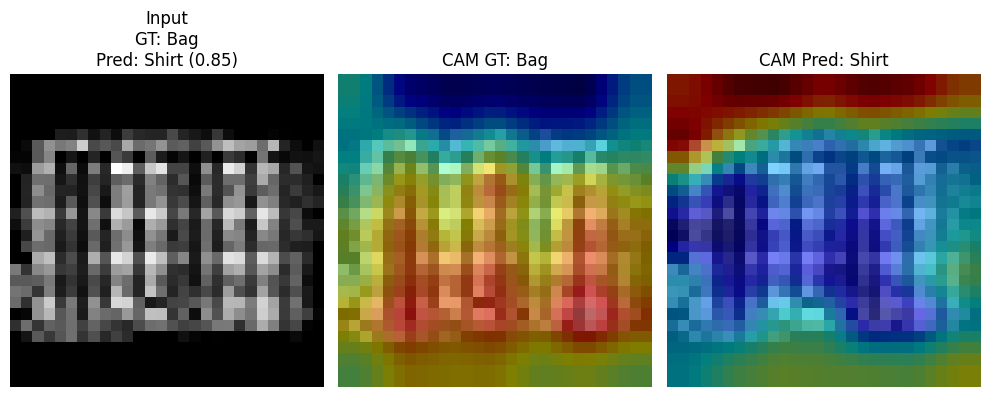

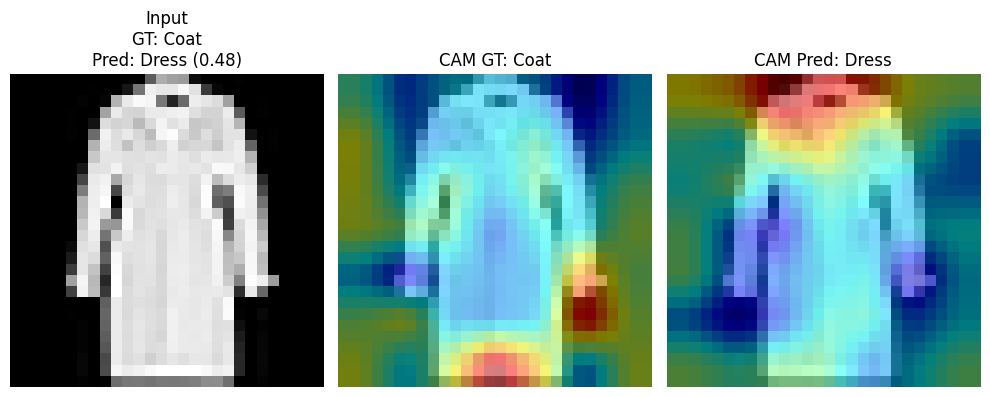

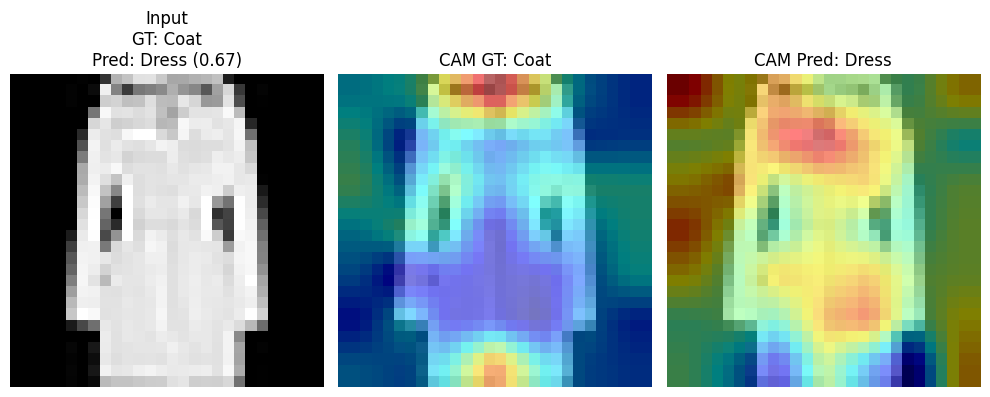

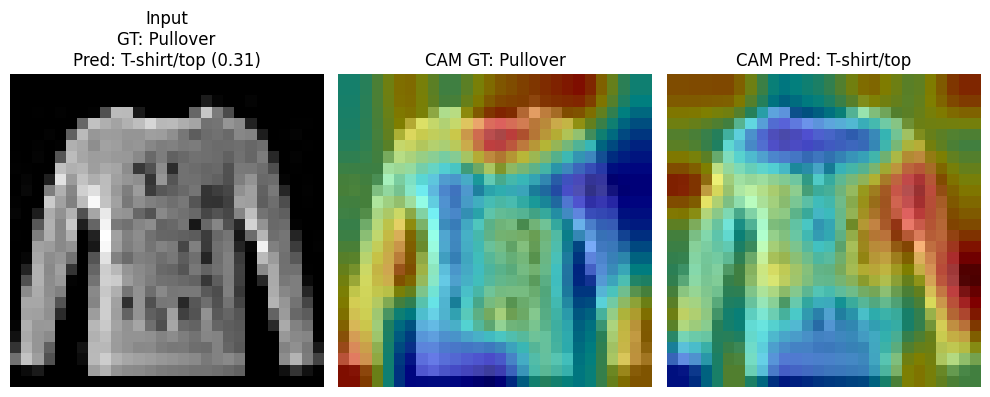

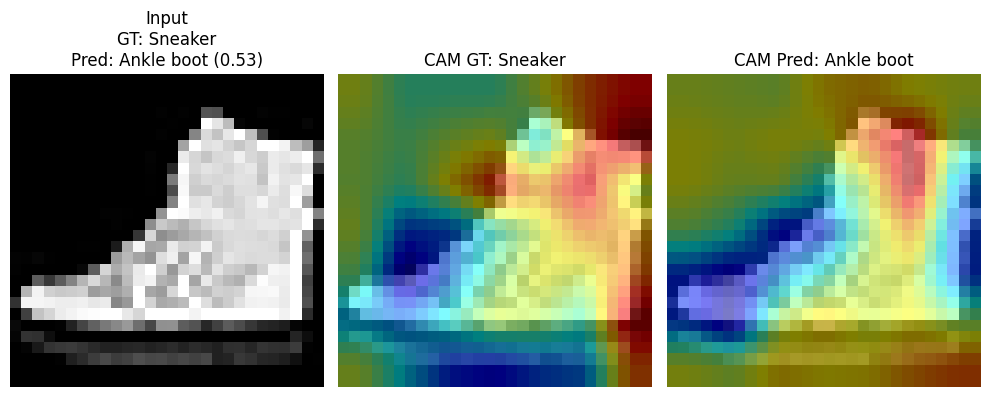

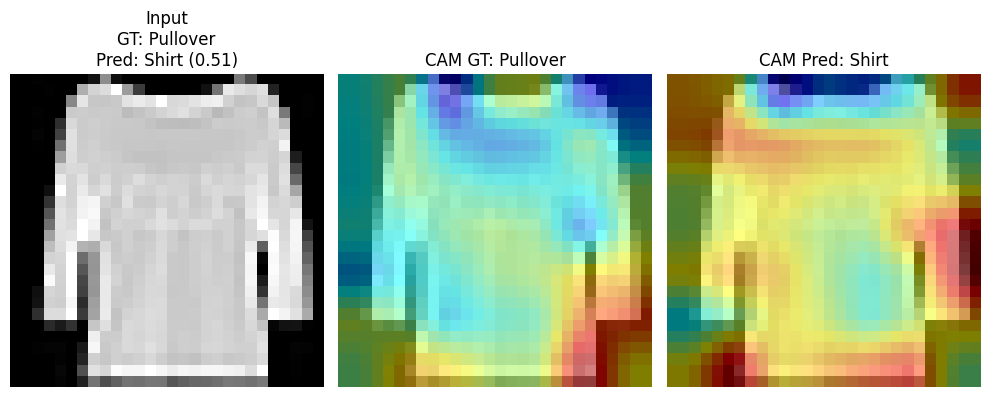

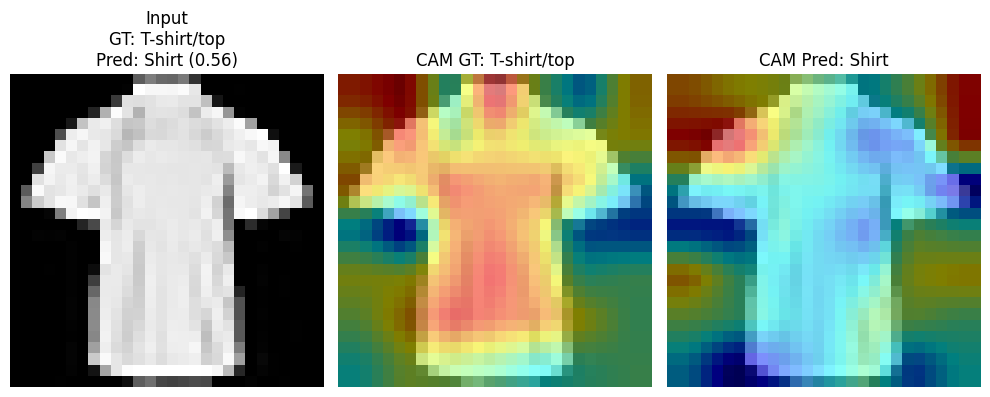

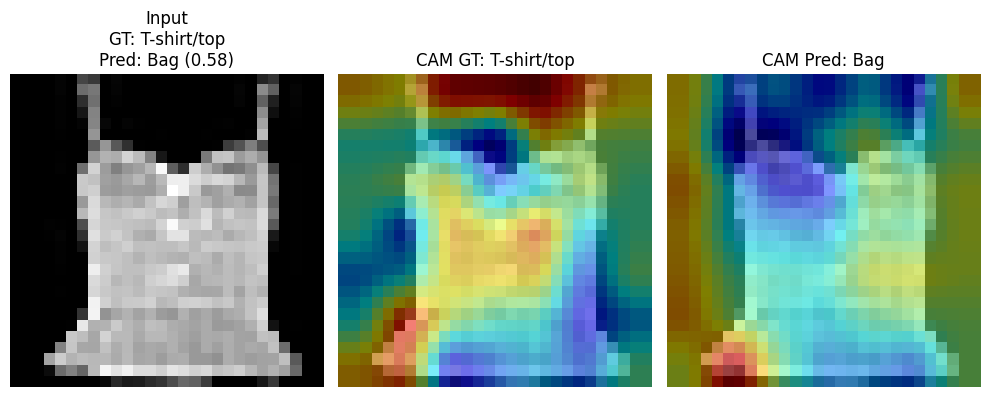

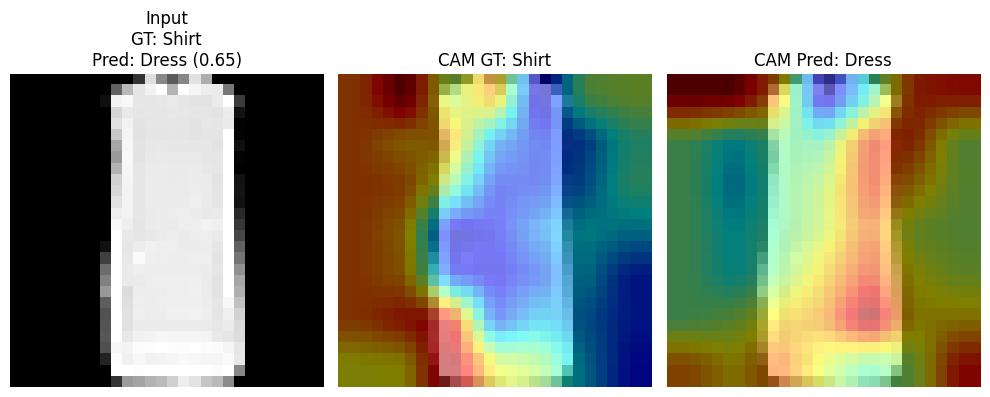

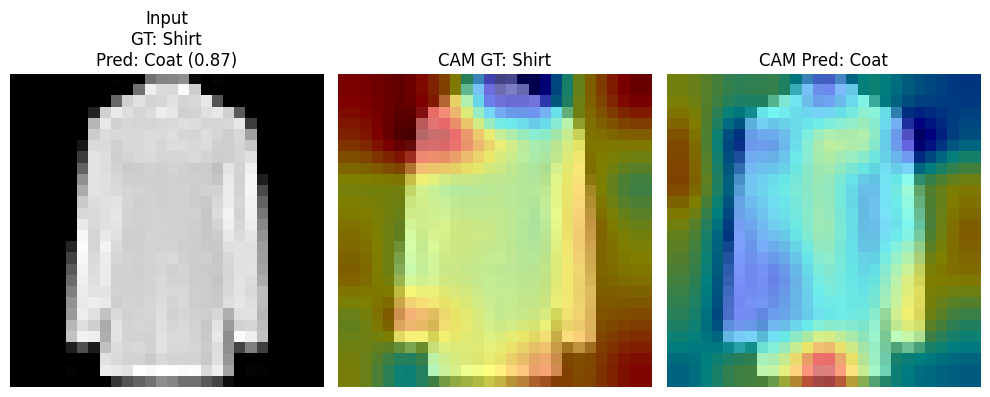

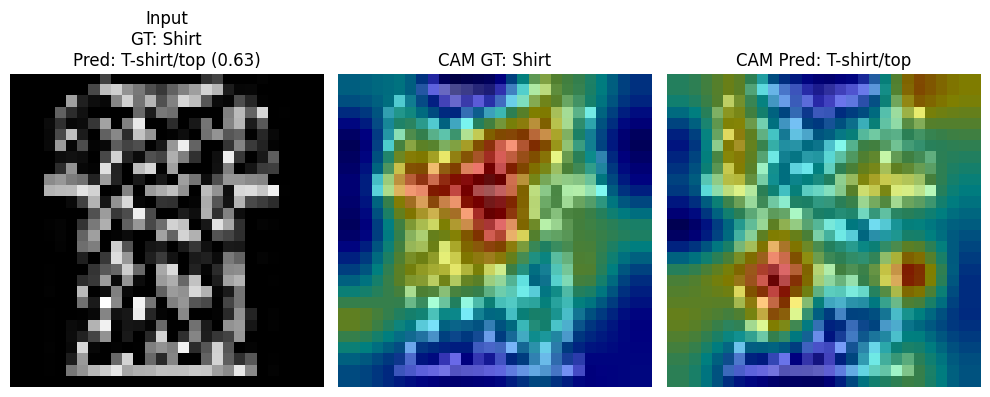

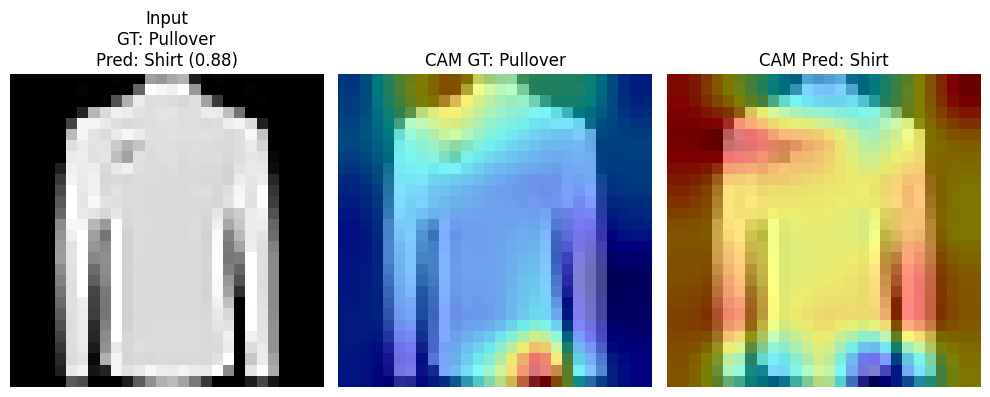

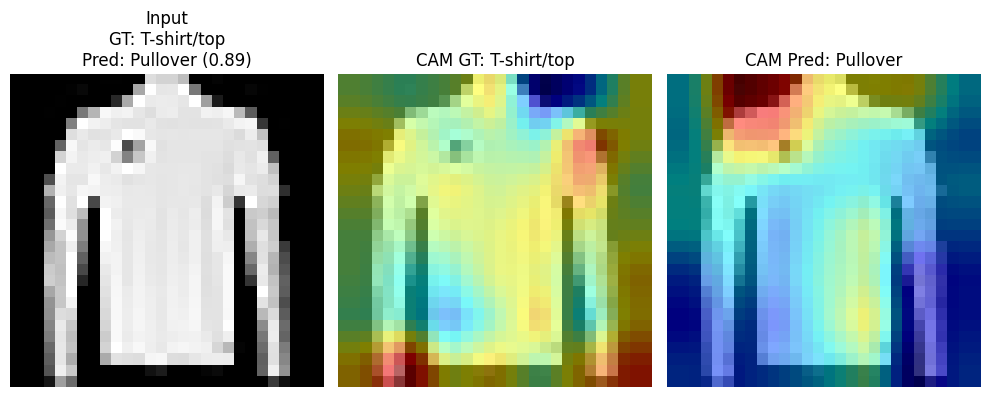

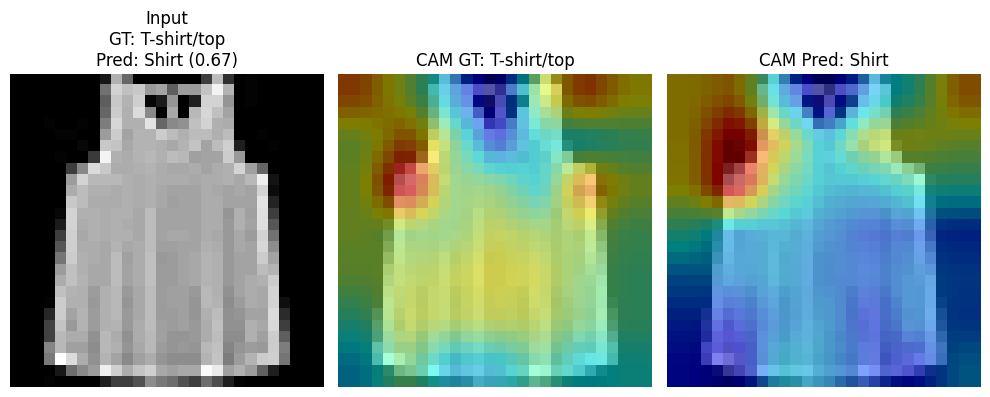

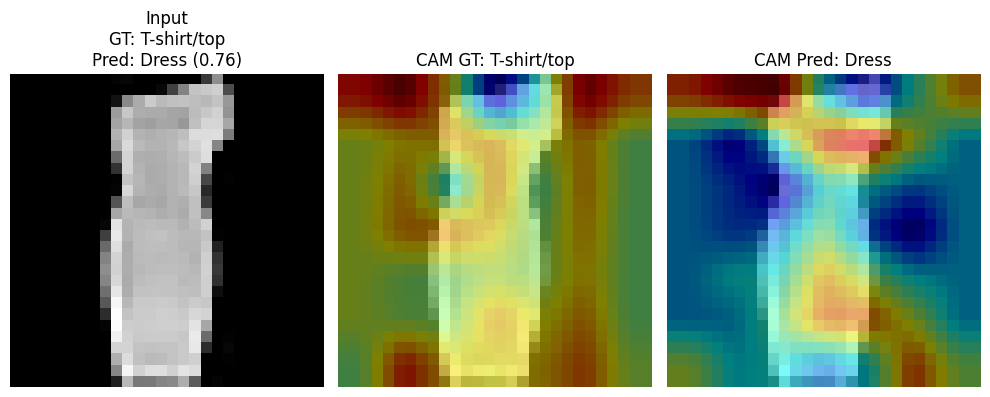

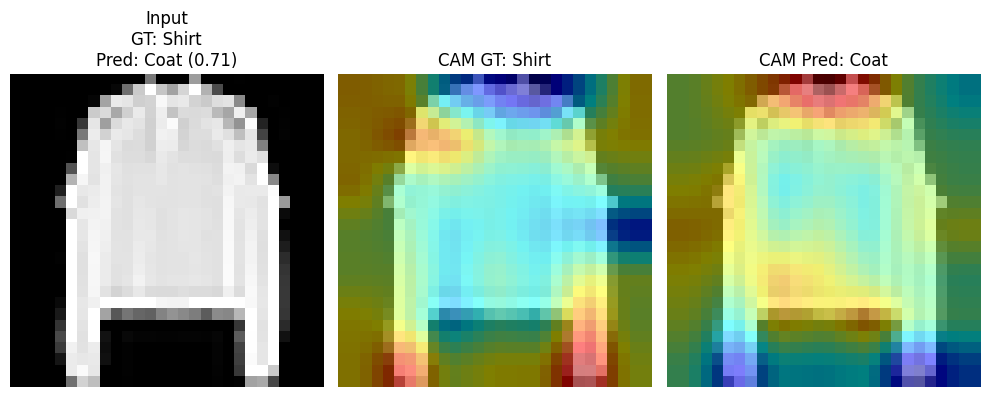

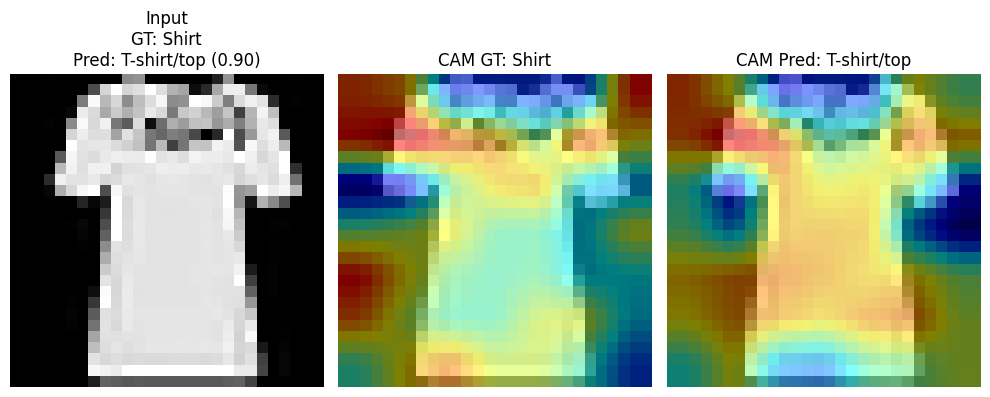

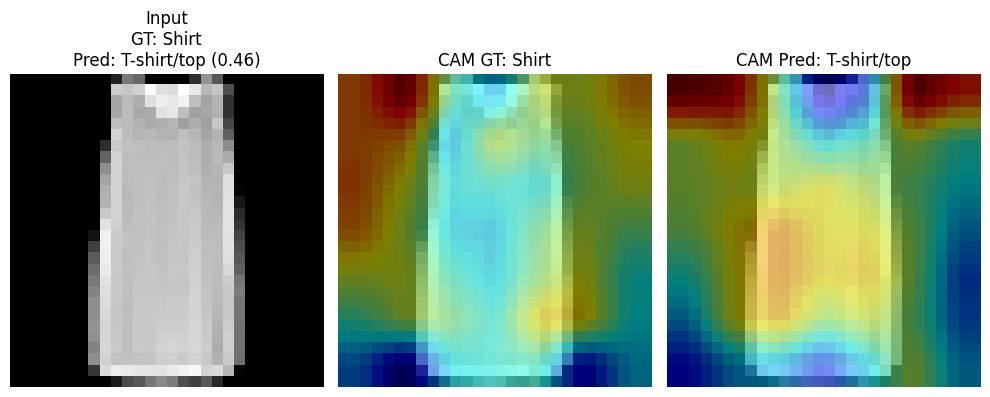

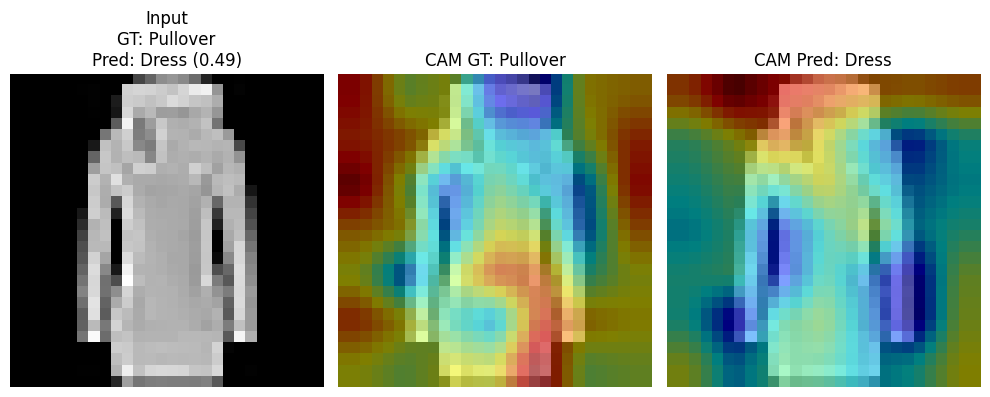

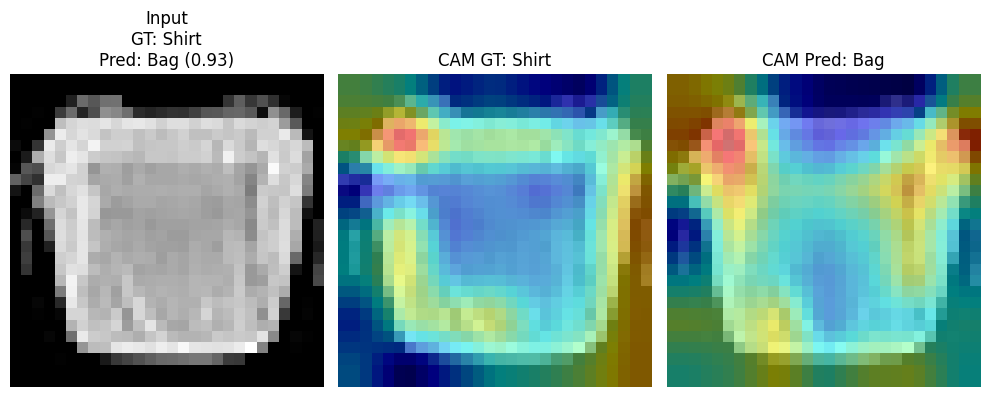

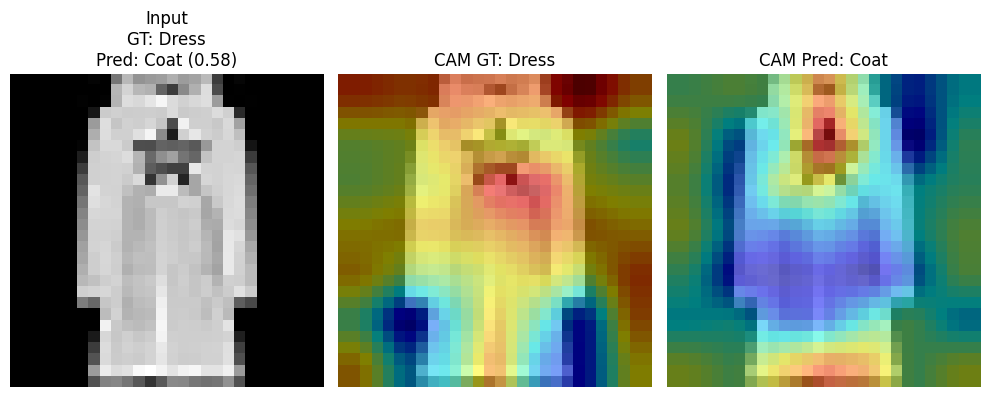

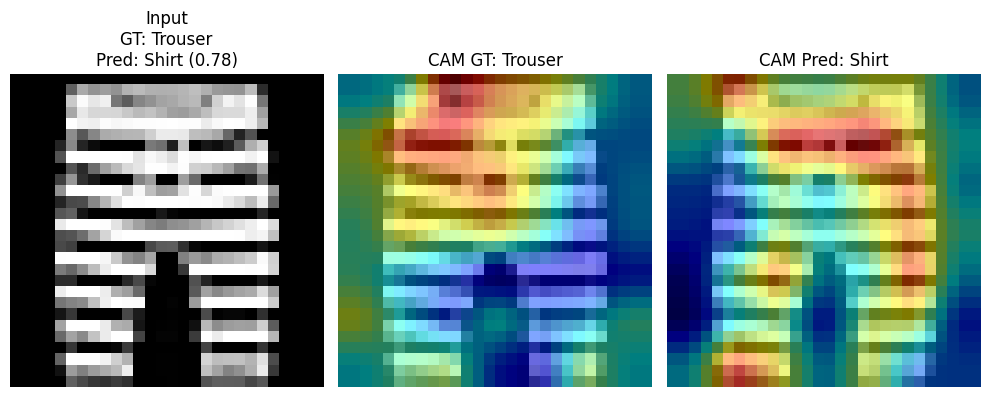

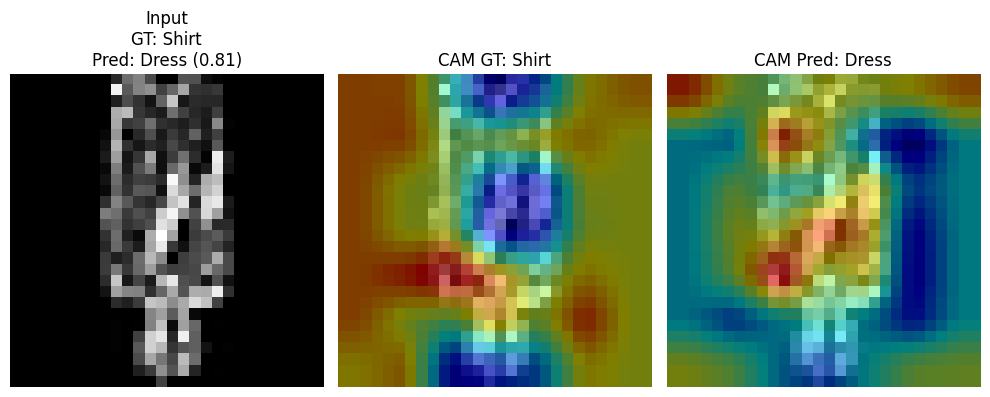

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from tqdm import tqdm
import random
import torch.nn.functional as F
import cv2

# ===========================
# Configuration and Settings
# ===========================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

config = {
    'batch_size': 512,  # smaller batch size might help a bit with convergence
    'learning_rate': 0.001,
    'num_epochs': 30,  # increase epochs
    'validation_split': 0.2,
    'seed': 42,
    'num_workers': 4,
    'patience': 7,  # slightly more patience
}

# ===========================
# Data Preparation
# ===========================
# According to the FashionMNIST documentation, mean ~0.2860 and std ~0.3530
mean_val = 0.2860
std_val = 0.3530

# Optional: add a slight data augmentation for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # data augmentation
    transforms.ToTensor(),
    transforms.Normalize((mean_val,), (std_val,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean_val,), (std_val,))
])

train_val_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

train_size = int((1 - config['validation_split']) * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_set, val_set = random_split(
    train_val_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(config['seed'])
)

val_set.dataset.transform = transform_test

train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=config['num_workers'],
    pin_memory=True
)

val_loader = DataLoader(
    val_set,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# ===========================
# Model Definition for CAM
# ===========================
class FashionCAM(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCAM, self).__init__()
        # Increase number of filters to improve capacity
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # 14x14x64

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)  # 7x7x128
        )

        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        # Single FC for class logits
        self.fc = nn.Linear(128, num_classes)
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        self.last_conv_output = x  # store for CAM generation (C,H,W)
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = FashionCAM(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

# Introduce a learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# ===========================
# Early Stopping
# ===========================
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss improved, saving model ...')
        torch.save(model.state_dict(), self.path)

early_stopping = EarlyStopping(patience=config['patience'], verbose=True)

# ===========================
# Training and Validation
# ===========================
def train_validate(model, criterion, optimizer, scheduler, num_epochs, train_loader, val_loader, device, early_stopping):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader, desc='Training', leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)

        # Step scheduler
        scheduler.step(epoch_val_loss)

        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

        # Early Stopping
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Load best model
    model.load_state_dict(torch.load(early_stopping.path))

    return {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

history = train_validate(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=config['num_epochs'],
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    early_stopping=early_stopping
)

# ===========================
# Plot Training/Validation Loss
# ===========================
def plot_training_history(history):
    epochs = range(1, len(history['train_losses']) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, history['train_losses'], label='Train Loss')
    plt.plot(epochs, history['val_losses'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

# ===========================
# Evaluation on Test Data
# ===========================
def evaluate_model(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Testing', leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return accuracy, f1, cm

test_accuracy, test_f1, cm = evaluate_model(model, test_loader, device)

# Save the final model
torch.save(model.state_dict(), 'fashion_cnn_modified_for_CAM.pth')
print("Model saved as fashion_cnn_modified_for_CAM.pth")

# ===========================
# CAM Generation Functions
# (Same as before, just adjusting fc_weights retrieval)
# ===========================
def generate_cam(feature_maps, fc_weights, class_idx):
    fc_weights = fc_weights.to(feature_maps.device)
    class_weights = fc_weights[class_idx]
    cam = torch.zeros(feature_maps.shape[1], feature_maps.shape[2], device=feature_maps.device)
    for c in range(feature_maps.shape[0]):
        cam += class_weights[c] * feature_maps[c, :, :]
    cam = cam.detach().cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam

def visualize_cam_on_image(img, cam, alpha=0.5):
    H, W = img.shape
    cam_resized = cv2.resize(cam, (W, H), interpolation=cv2.INTER_LINEAR)
    img = (img * std_val + mean_val) * 255.0  # denormalize for visualization
    img = np.clip(img, 0, 255).astype(np.uint8)
    img = np.stack([img, img, img], axis=2)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap * alpha + np.float32(img) / 255 * (1 - alpha)
    overlayed = np.clip(overlayed, 0, 1)
    return (overlayed * 255).astype(np.uint8)

fc_weights = model.fc.weight.data

def get_single_image_cam(model, image, label, class_labels):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)
        outputs = model(image)
        probs = F.softmax(outputs, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        pred_prob = probs[0, pred_class].item()
        gt_class = label.item()

    feature_maps = model.last_conv_output[0]

    cam_pred = generate_cam(feature_maps, fc_weights, pred_class)
    cam_gt = generate_cam(feature_maps, fc_weights, gt_class) if gt_class != pred_class else None

    return pred_class, pred_prob, cam_pred, cam_gt

def show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels):
    img_np = image.numpy().squeeze()
    plt.figure(figsize=(10, 10))

    if cam_gt is None:
        # correct prediction
        plt.subplot(1, 2, 1)
        plt.imshow((img_np*std_val + mean_val), cmap='gray')  # denormalized
        plt.title(f"Input\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 2, 2)
        plt.imshow(overlay_pred)
        plt.title(f"CAM: {class_labels[pred_class]}")
        plt.axis('off')
    else:
        # incorrect prediction
        plt.subplot(1, 3, 1)
        plt.imshow((img_np*std_val + mean_val), cmap='gray')
        plt.title(f"Input\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        overlay_gt = visualize_cam_on_image(img_np, cam_gt)
        plt.subplot(1, 3, 2)
        plt.imshow(overlay_gt)
        plt.title(f"CAM GT: {class_labels[label.item()]}")
        plt.axis('off')

        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 3, 3)
        plt.imshow(overlay_pred)
        plt.title(f"CAM Pred: {class_labels[pred_class]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# ===========================
# Select Samples for CAM Visualization
# ===========================
model.eval()
all_images = []
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_images.append(images.cpu())
        all_labels.append(labels.cpu())
        all_preds.append(preds.cpu())

all_images = torch.cat(all_images)
all_labels = torch.cat(all_labels)
all_preds = torch.cat(all_preds)

correct_idx = (all_preds == all_labels)
incorrect_idx = (all_preds != all_labels)

correct_images = all_images[correct_idx]
correct_labels = all_labels[correct_idx]
correct_preds = all_preds[correct_idx]

incorrect_images = all_images[incorrect_idx]
incorrect_labels = all_labels[incorrect_idx]
incorrect_preds = all_preds[incorrect_idx]

# For the 10 correct predictions (one from each class)
picked_correct = []
class_found = set()
for i in range(len(correct_images)):
    c = correct_labels[i].item()
    if c not in class_found:
        picked_correct.append(i)
        class_found.add(c)
    if len(class_found) == 10:
        break

if len(incorrect_images) > 30:
    picked_incorrect = np.random.choice(range(len(incorrect_images)), size=30, replace=False)
else:
    picked_incorrect = range(len(incorrect_images))

print("Showing CAMs for 10 correct predictions (one from each class):")
for idx in picked_correct:
    image = correct_images[idx]
    label = correct_labels[idx]
    pred_class, pred_prob, cam_pred, _ = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, None, class_labels)

print("Showing CAMs for 30 incorrect predictions:")
count = 0
for idx in picked_incorrect:
    image = incorrect_images[idx]
    label = incorrect_labels[idx]
    pred_class, pred_prob, cam_pred, cam_gt = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels)
    count += 1
    if count >= 30:
        break

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cuda
Epoch 1/30
----------


Train Loss: 1.1352, Train Acc: 66.28%
Val Loss: 0.9382, Val Acc: 71.32%
Validation loss improved, saving model ...
Epoch 2/30
----------


Train Loss: 0.6802, Train Acc: 78.86%
Val Loss: 0.6642, Val Acc: 78.59%
Validation loss improved, saving model ...
Epoch 3/30
----------


Train Loss: 0.5535, Train Acc: 82.12%
Val Loss: 0.5748, Val Acc: 81.06%
Validation loss improved, saving model ...
Epoch 4/30
----------


Train Loss: 0.4958, Train Acc: 83.29%
Val Loss: 0.5584, Val Acc: 80.97%
Validation loss improved, saving model ...
Epoch 5/30
----------


Train Loss: 0.4538, Train Acc: 84.67%
Val Loss: 0.4848, Val Acc: 82.63%
Validation loss improved, saving model ...
Epoch 6/30
----------


Train Loss: 0.4254, Train Acc: 85.60%
Val Loss: 0.4672, Val Acc: 84.29%
Validation loss improved, saving model ...
Epoch 7/30
----------


Train Loss: 0.4062, Train Acc: 86.12%
Val Loss: 0.4353, Val Acc: 85.58%
Validation loss improved, saving model ...
Epoch 8/30
----------


Train Loss: 0.3862, Train Acc: 86.71%
Val Loss: 0.4629, Val Acc: 84.70%
EarlyStopping counter: 1 out of 7
Epoch 9/30
----------


Train Loss: 0.3724, Train Acc: 87.29%
Val Loss: 0.4217, Val Acc: 85.42%
Validation loss improved, saving model ...
Epoch 10/30
----------


Train Loss: 0.3578, Train Acc: 87.71%
Val Loss: 0.4501, Val Acc: 83.85%
EarlyStopping counter: 1 out of 7
Epoch 11/30
----------


Train Loss: 0.3451, Train Acc: 88.21%
Val Loss: 0.3793, Val Acc: 86.33%
Validation loss improved, saving model ...
Epoch 12/30
----------


Train Loss: 0.3352, Train Acc: 88.60%
Val Loss: 0.3921, Val Acc: 86.34%
EarlyStopping counter: 1 out of 7
Epoch 13/30
----------


Train Loss: 0.3252, Train Acc: 88.91%
Val Loss: 0.4076, Val Acc: 86.19%
EarlyStopping counter: 2 out of 7
Epoch 14/30
----------


Train Loss: 0.3140, Train Acc: 89.35%
Val Loss: 0.3491, Val Acc: 88.00%
Validation loss improved, saving model ...
Epoch 15/30
----------


Train Loss: 0.3062, Train Acc: 89.56%
Val Loss: 0.3783, Val Acc: 86.46%
EarlyStopping counter: 1 out of 7
Epoch 16/30
----------


Train Loss: 0.3013, Train Acc: 89.63%
Val Loss: 0.4343, Val Acc: 84.29%
EarlyStopping counter: 2 out of 7
Epoch 17/30
----------


Train Loss: 0.2943, Train Acc: 89.86%
Val Loss: 0.3320, Val Acc: 88.26%
Validation loss improved, saving model ...
Epoch 18/30
----------


Train Loss: 0.2892, Train Acc: 90.09%
Val Loss: 0.3580, Val Acc: 87.55%
EarlyStopping counter: 1 out of 7
Epoch 19/30
----------


Train Loss: 0.2801, Train Acc: 90.37%
Val Loss: 0.3253, Val Acc: 88.30%
Validation loss improved, saving model ...
Epoch 20/30
----------


Train Loss: 0.2772, Train Acc: 90.58%
Val Loss: 0.3433, Val Acc: 87.82%
EarlyStopping counter: 1 out of 7
Epoch 21/30
----------


Train Loss: 0.2697, Train Acc: 90.59%
Val Loss: 0.3084, Val Acc: 89.22%
Validation loss improved, saving model ...
Epoch 22/30
----------


Train Loss: 0.2662, Train Acc: 90.83%
Val Loss: 0.4008, Val Acc: 86.15%
EarlyStopping counter: 1 out of 7
Epoch 23/30
----------


Train Loss: 0.2575, Train Acc: 91.31%
Val Loss: 0.3681, Val Acc: 87.73%
EarlyStopping counter: 2 out of 7
Epoch 24/30
----------


Train Loss: 0.2582, Train Acc: 91.12%
Val Loss: 0.3151, Val Acc: 89.22%
EarlyStopping counter: 3 out of 7
Epoch 25/30
----------


Train Loss: 0.2509, Train Acc: 91.49%
Val Loss: 0.2995, Val Acc: 89.58%
Validation loss improved, saving model ...
Epoch 26/30
----------


Train Loss: 0.2462, Train Acc: 91.63%
Val Loss: 0.2853, Val Acc: 89.81%
Validation loss improved, saving model ...
Epoch 27/30
----------


Train Loss: 0.2436, Train Acc: 91.65%
Val Loss: 0.2878, Val Acc: 89.90%
EarlyStopping counter: 1 out of 7
Epoch 28/30
----------


Train Loss: 0.2373, Train Acc: 91.79%
Val Loss: 0.3046, Val Acc: 89.66%
EarlyStopping counter: 2 out of 7
Epoch 29/30
----------


Train Loss: 0.2365, Train Acc: 91.96%
Val Loss: 0.3107, Val Acc: 89.44%
EarlyStopping counter: 3 out of 7
Epoch 30/30
----------


<ipython-input-5-ced40b021d0b>:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(early_stopping.path))


Train Loss: 0.2307, Train Acc: 92.07%
Val Loss: 0.2721, Val Acc: 90.54%
Validation loss improved, saving model ...


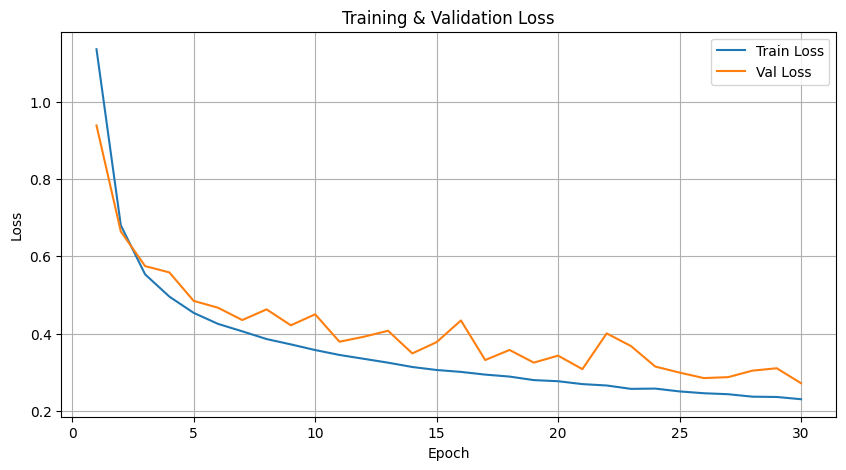

Test Accuracy: 89.91%
Test F1 Score: 0.8958


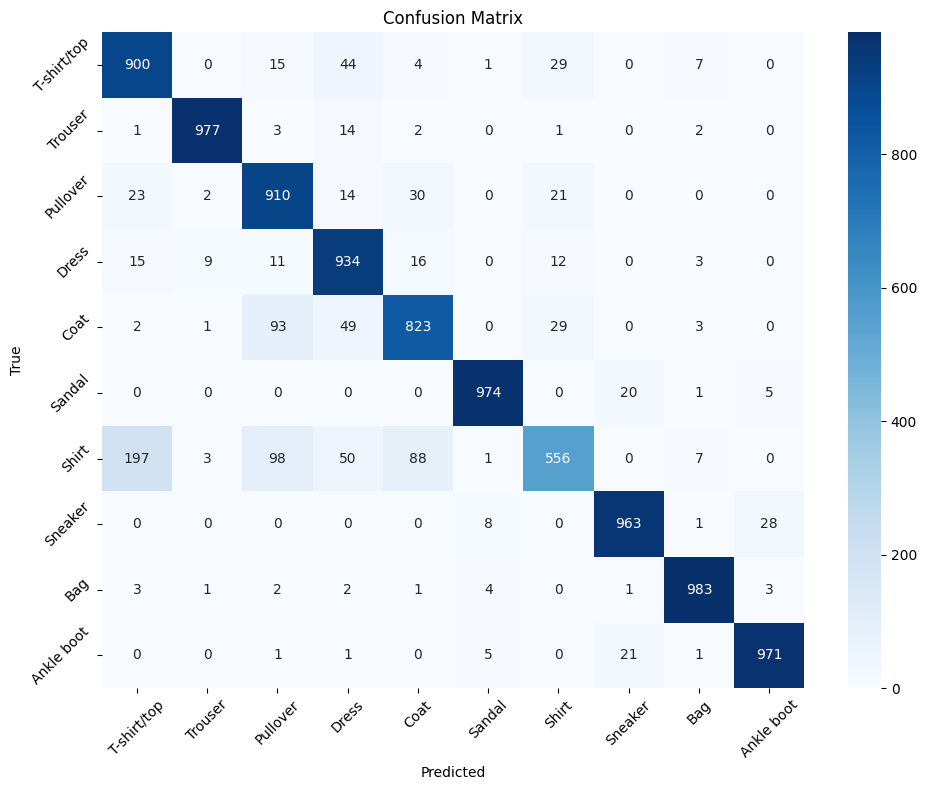

Model saved as fashion_cnn_modified_for_CAM.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Showing CAMs for 10 correct predictions (one from each class):


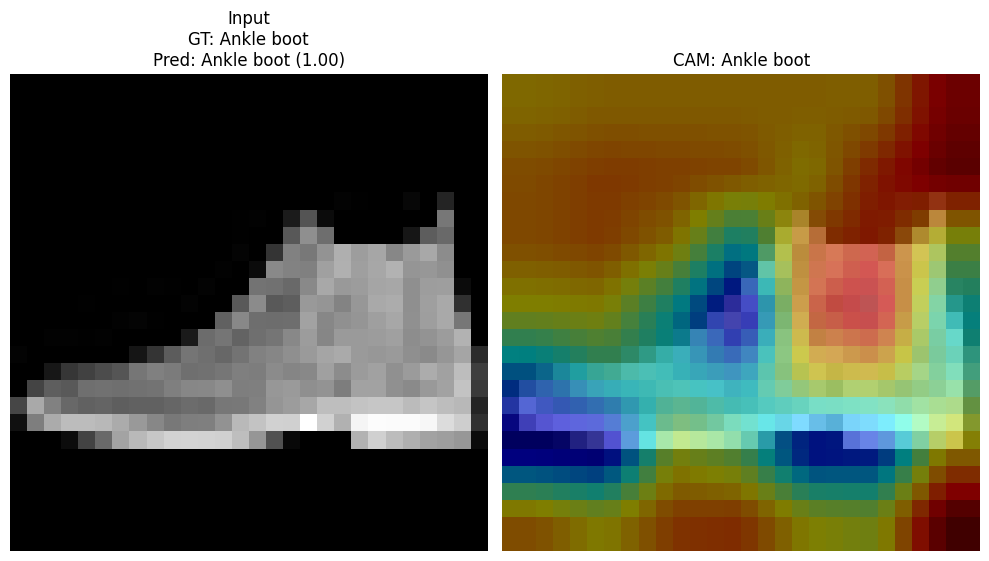

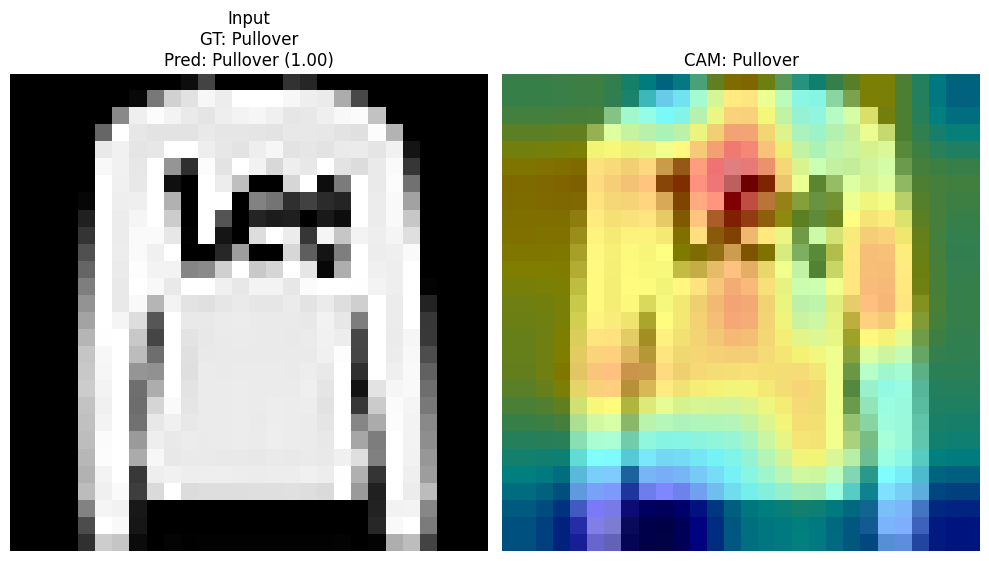

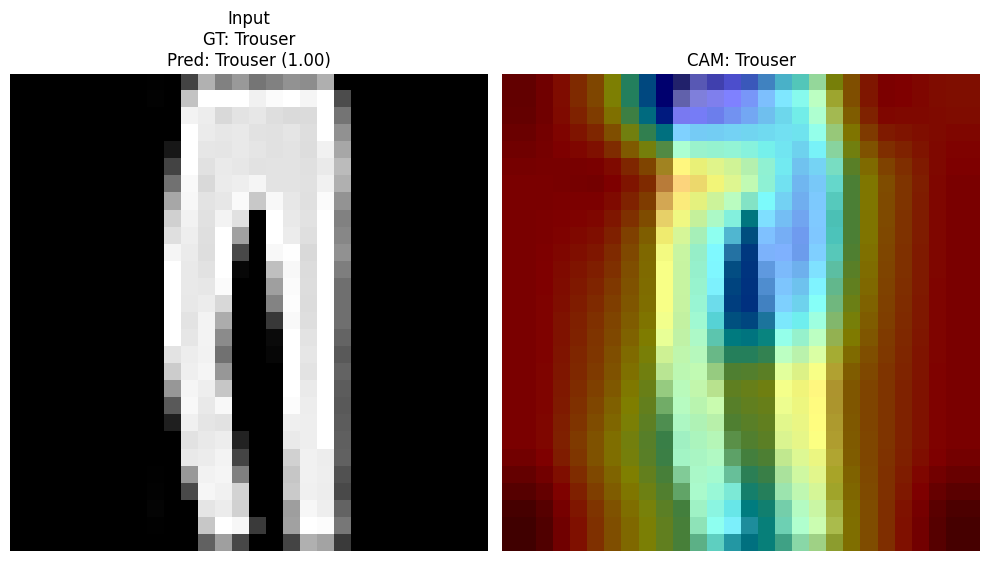

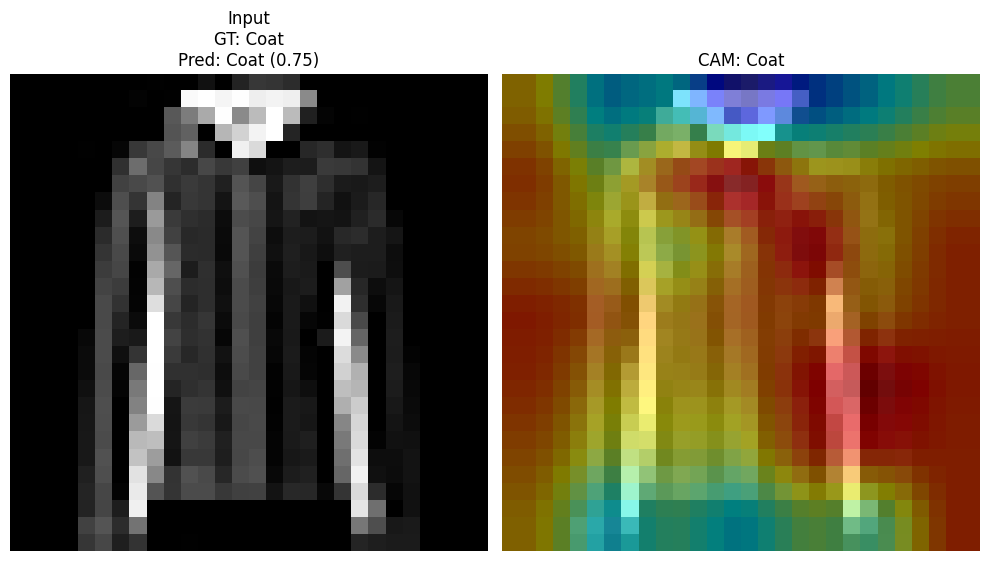

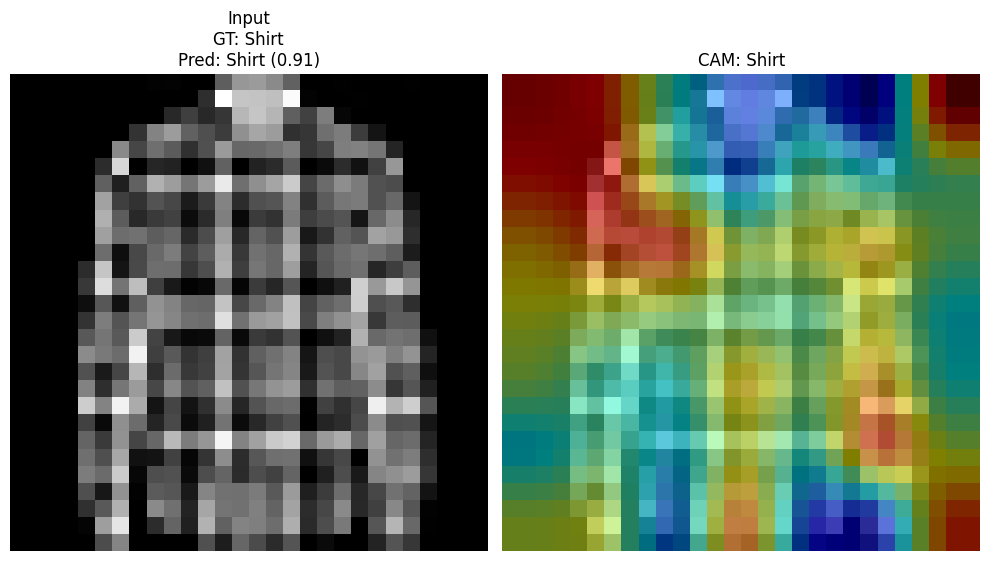

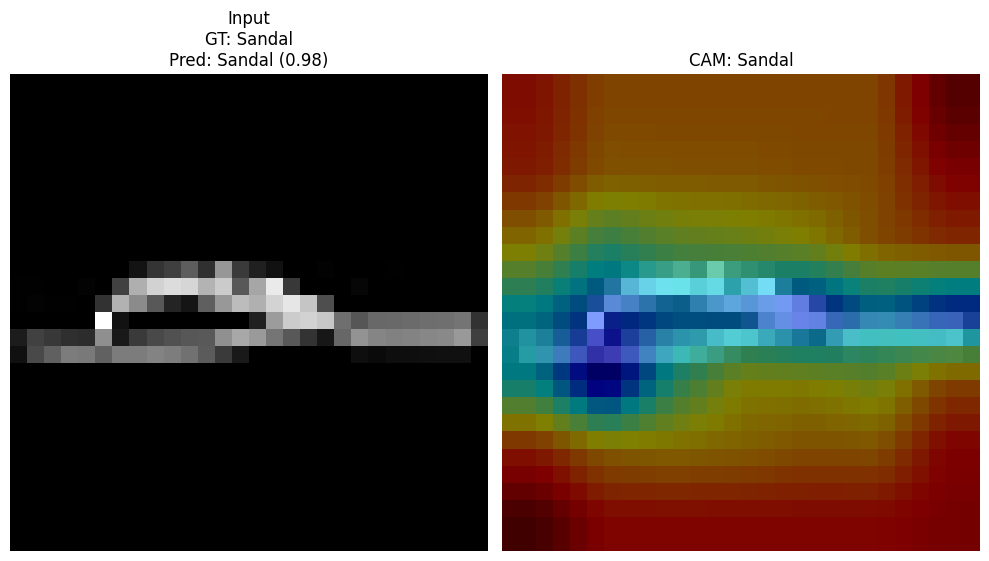

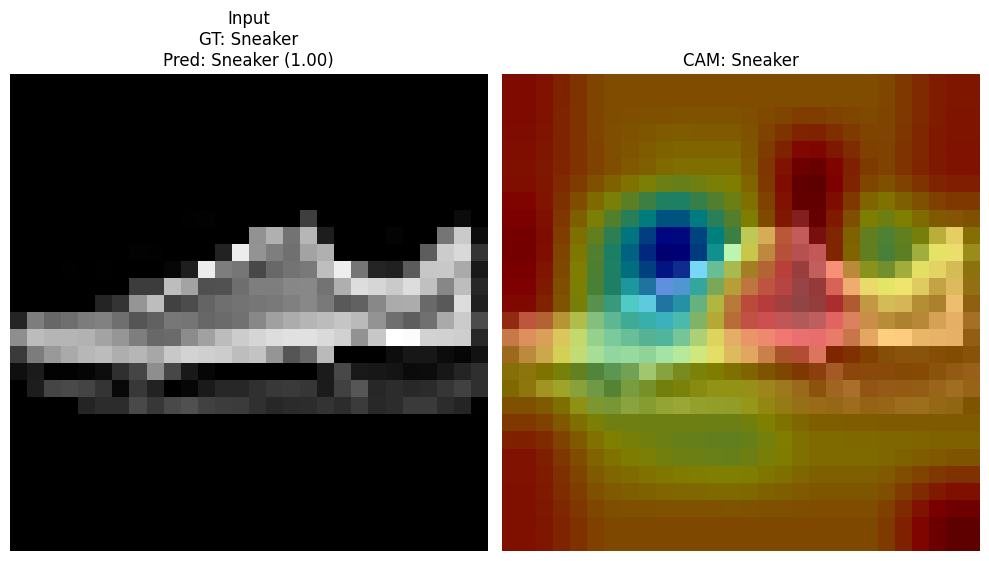

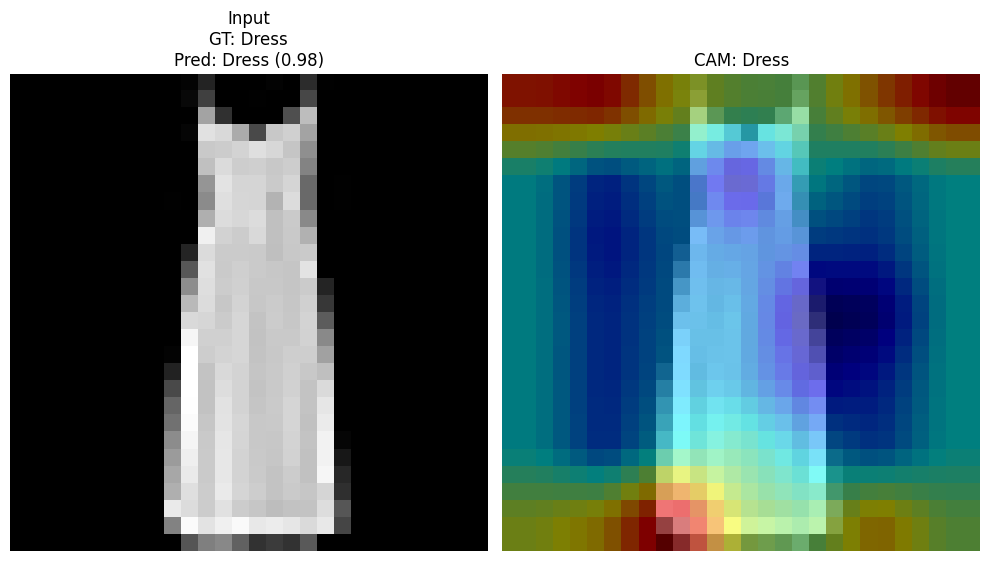

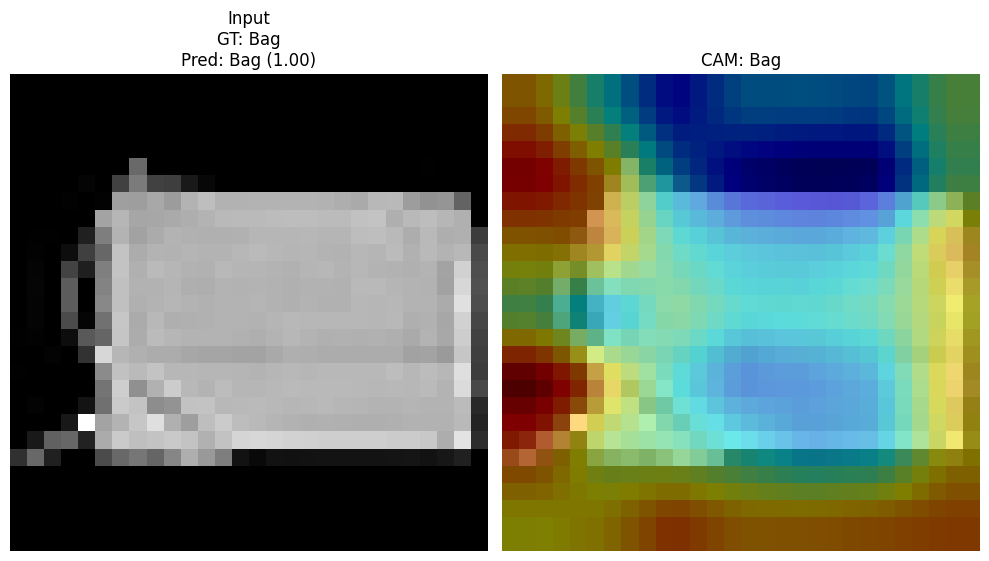

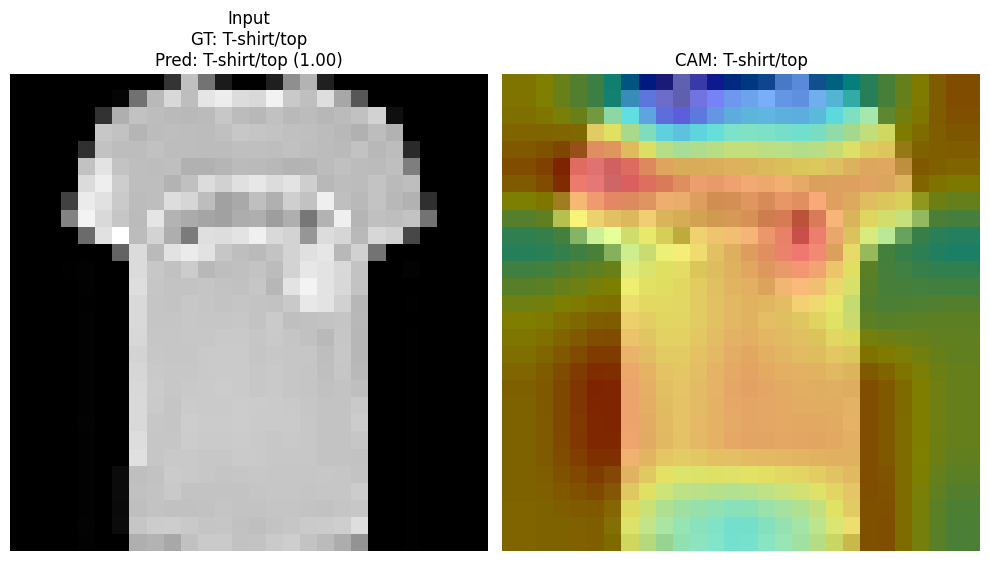

Showing CAMs for 30 incorrect predictions:


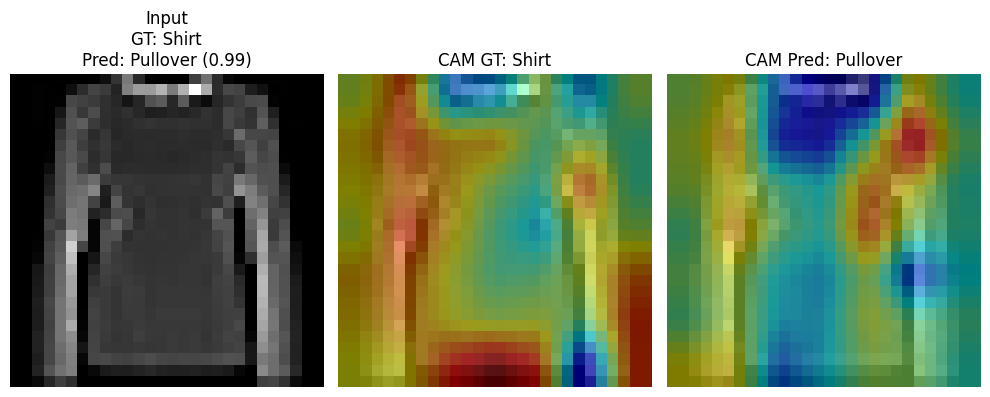

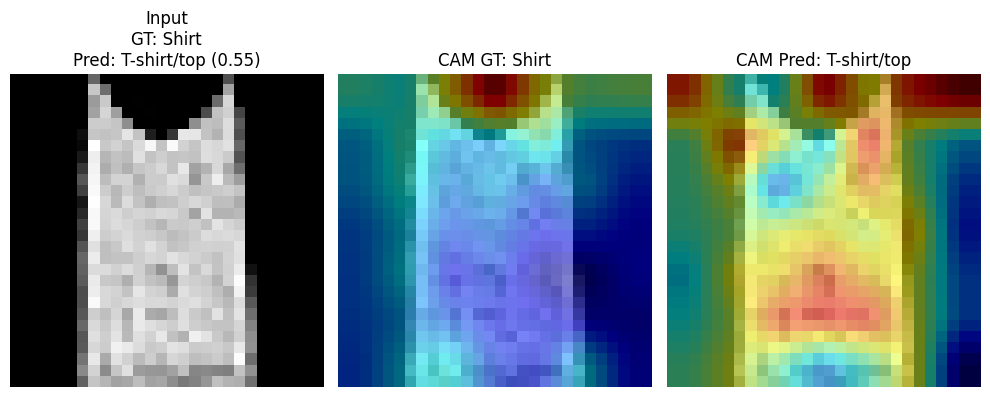

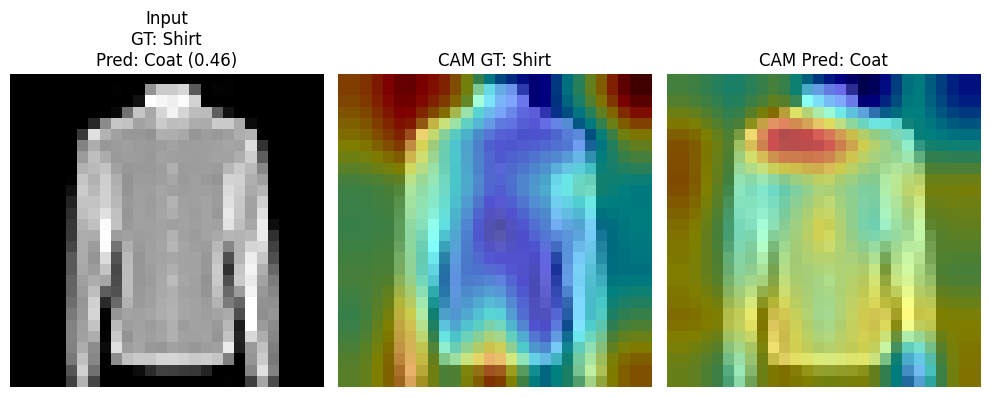

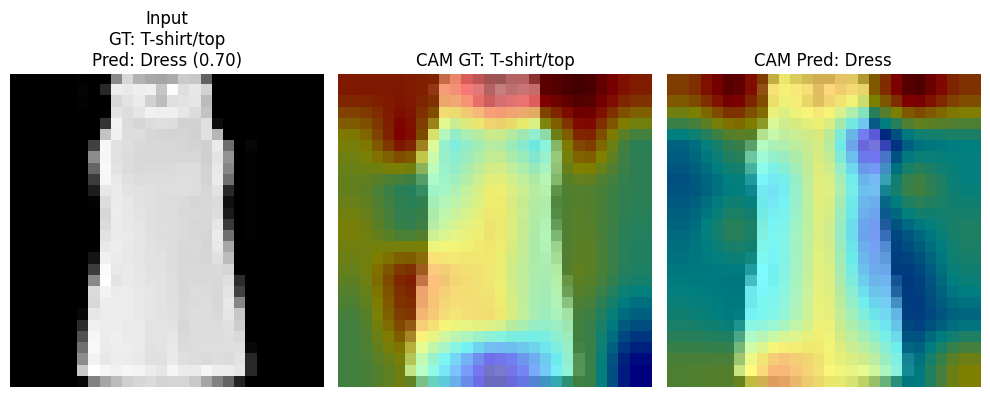

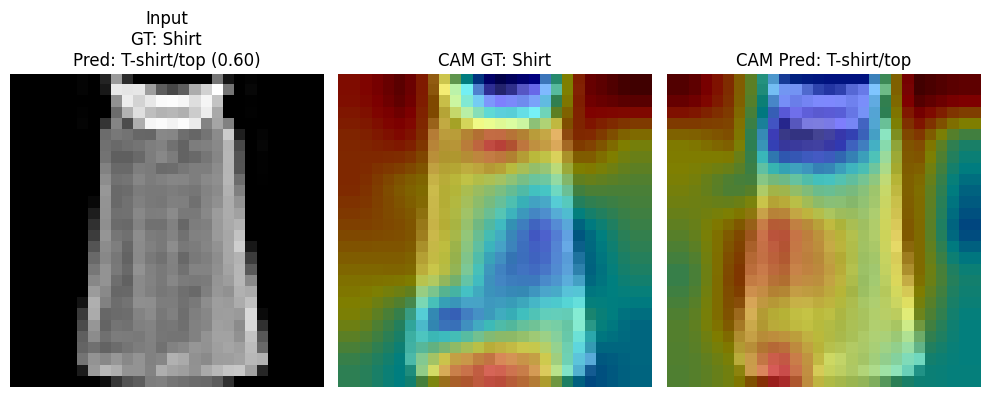

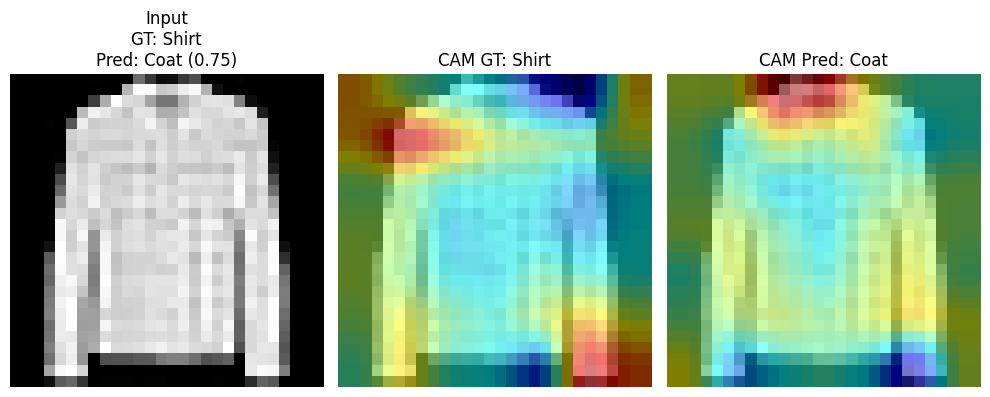

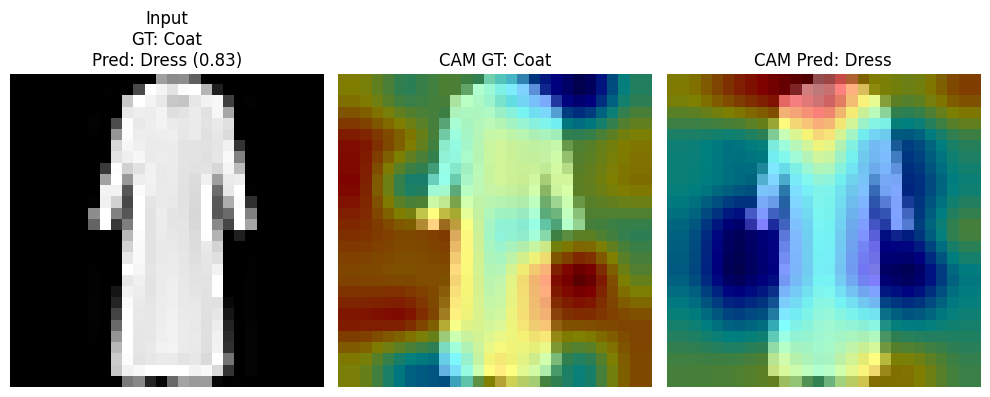

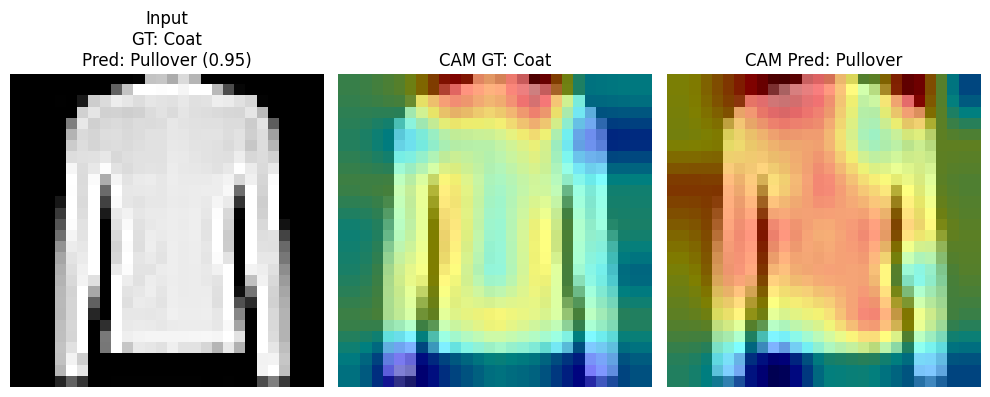

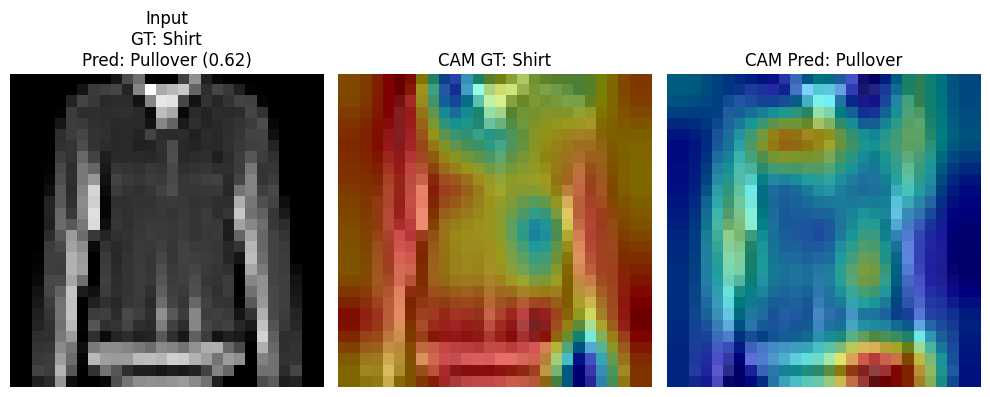

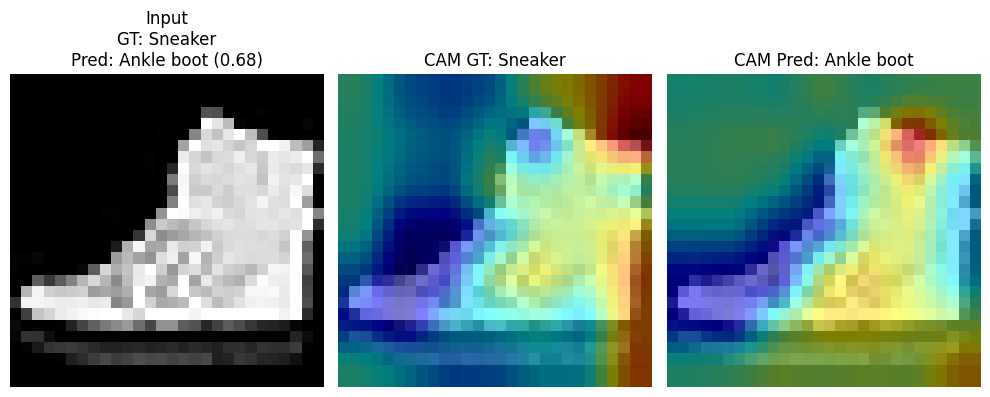

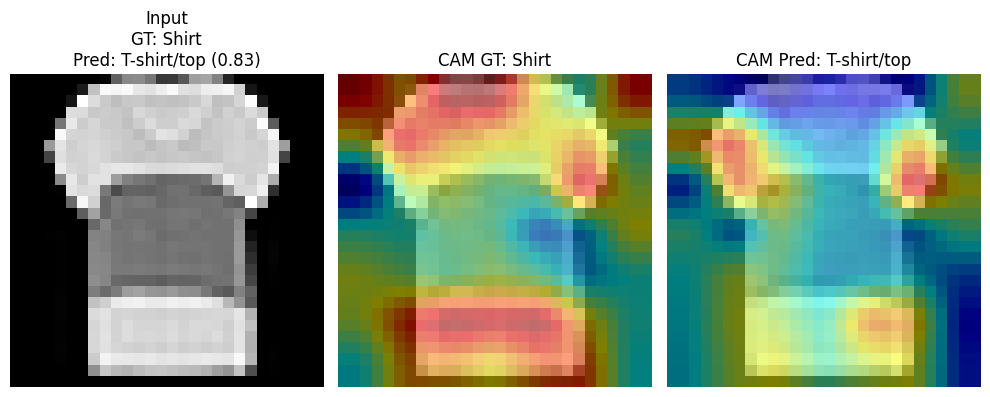

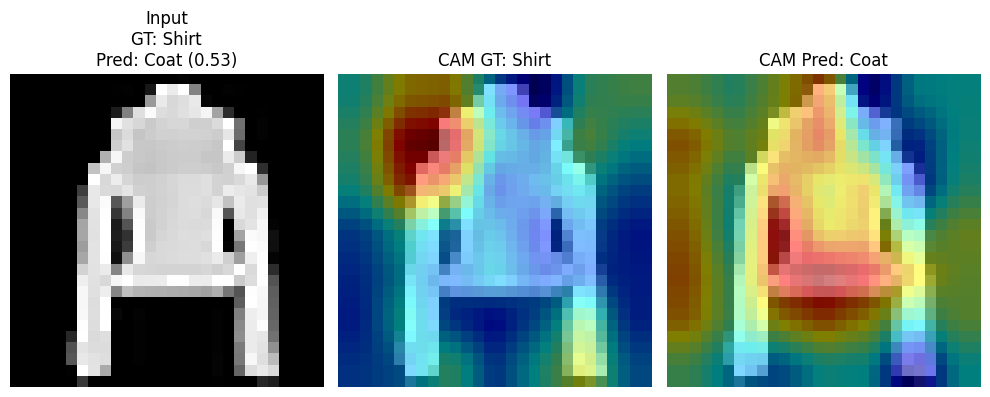

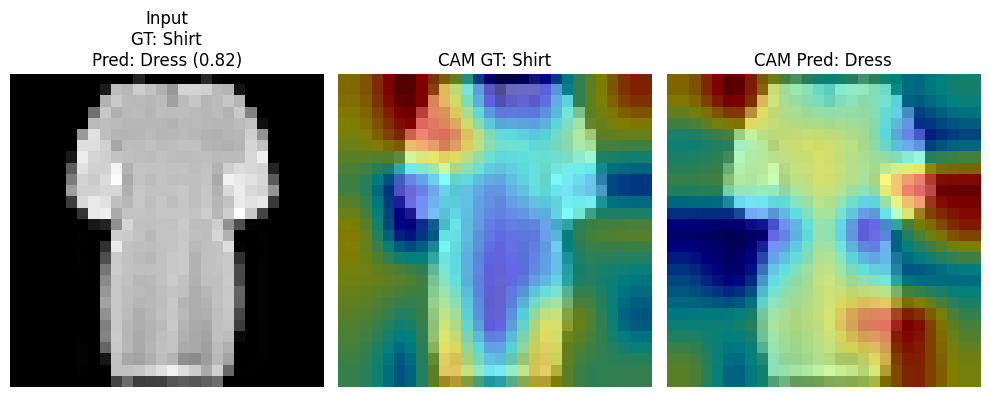

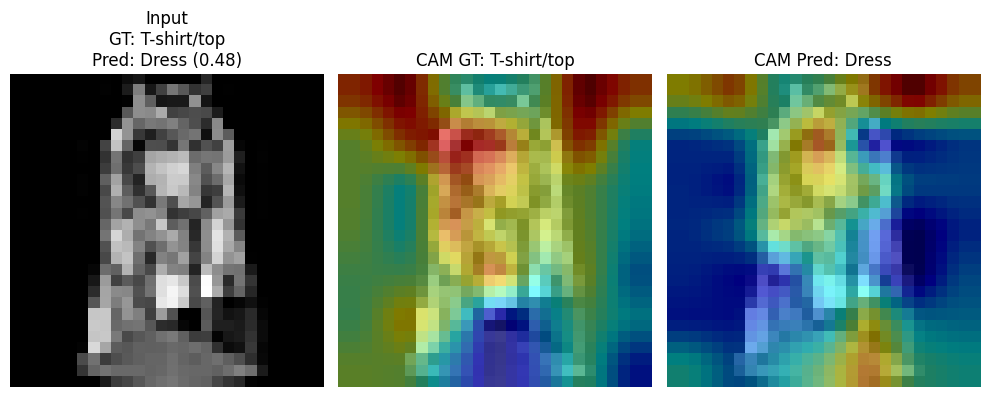

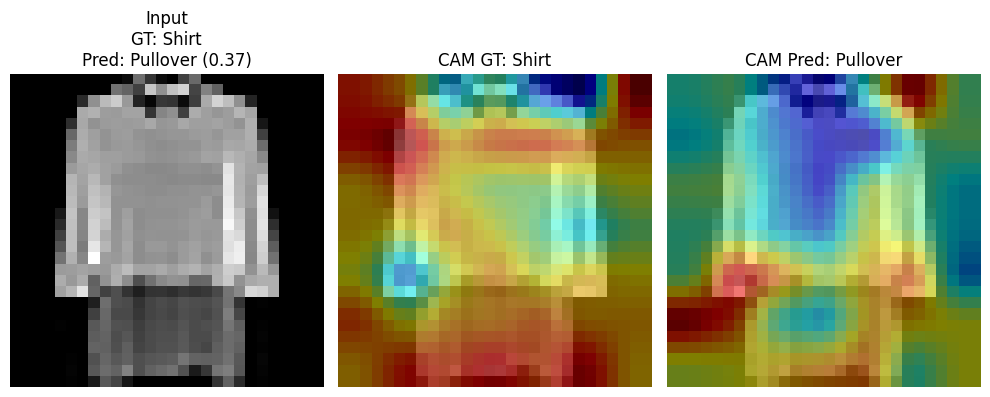

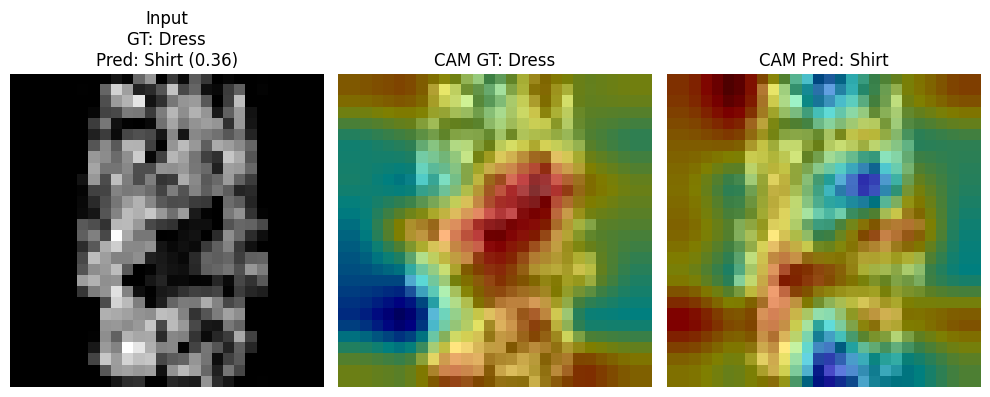

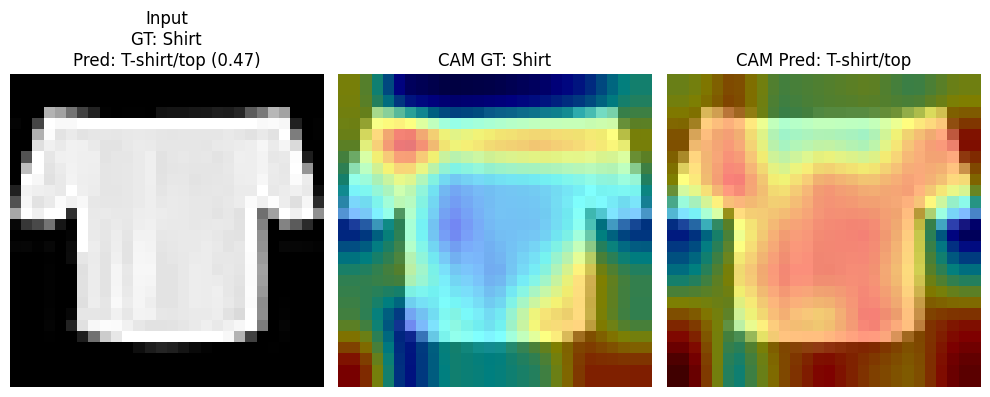

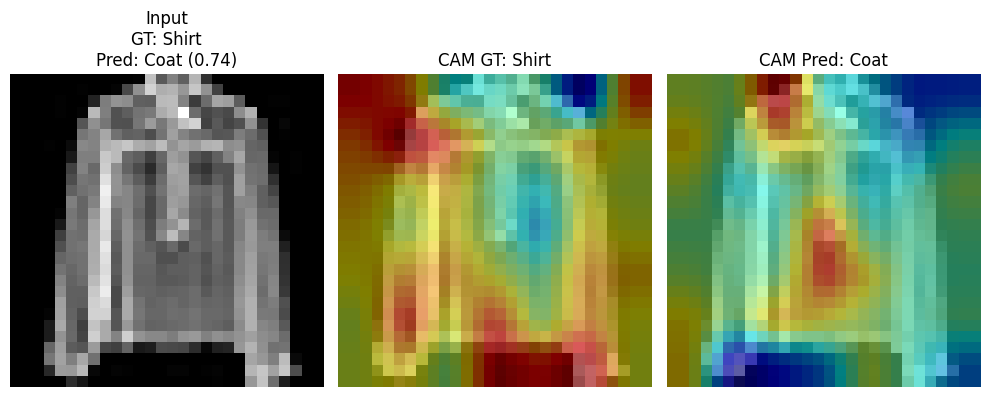

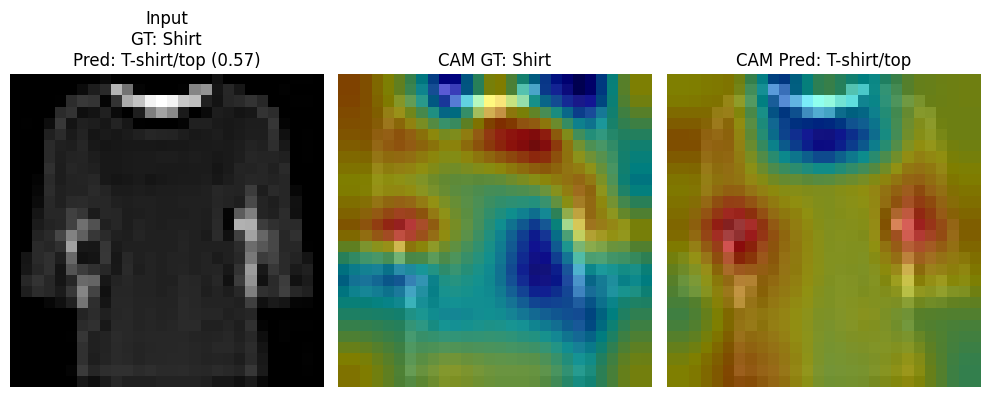

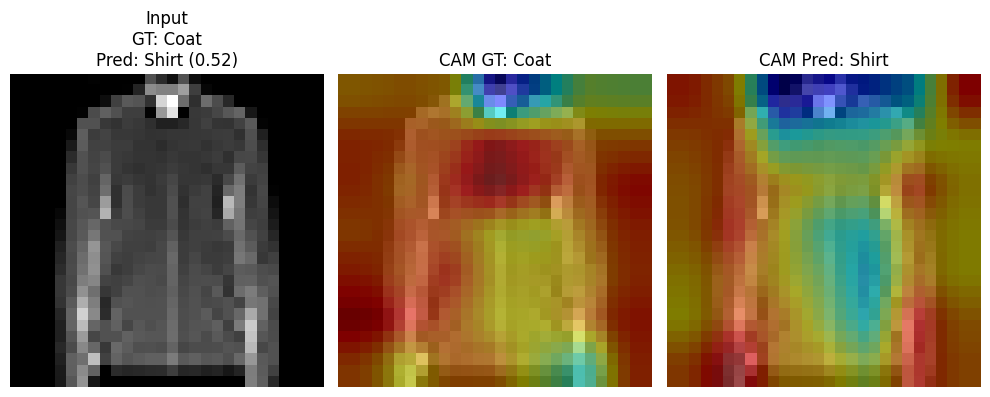

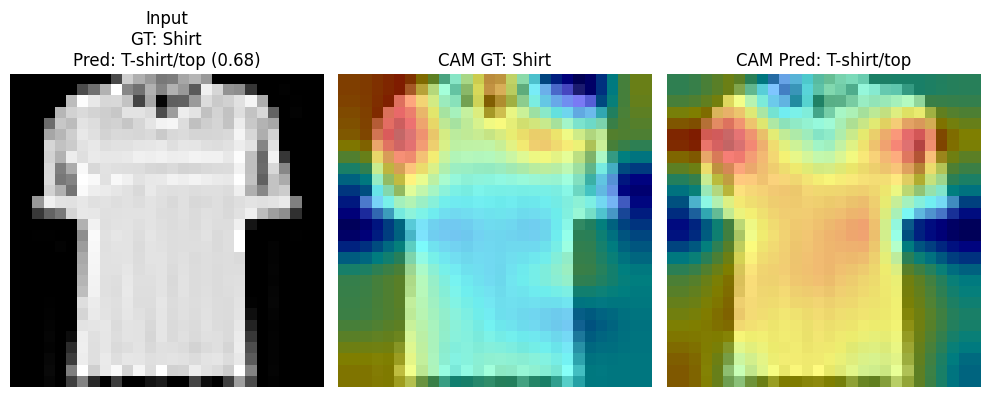

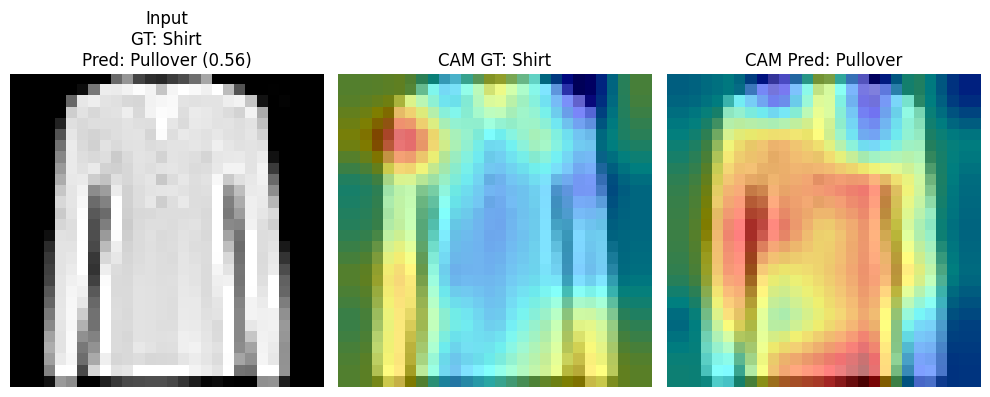

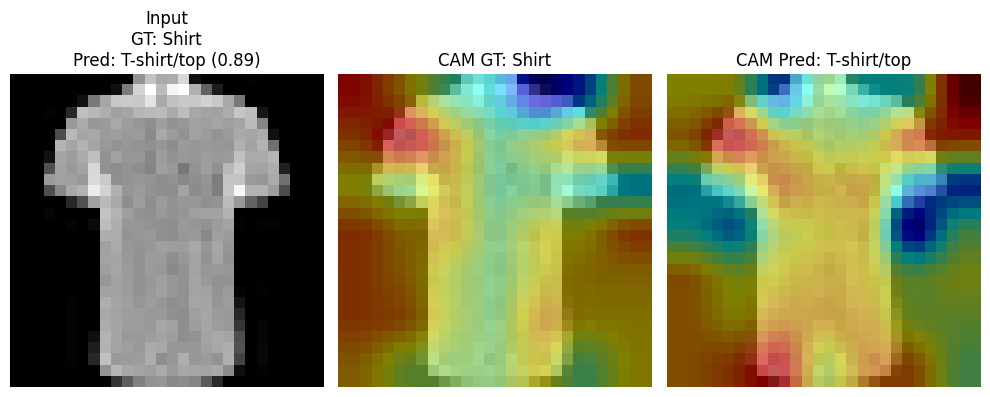

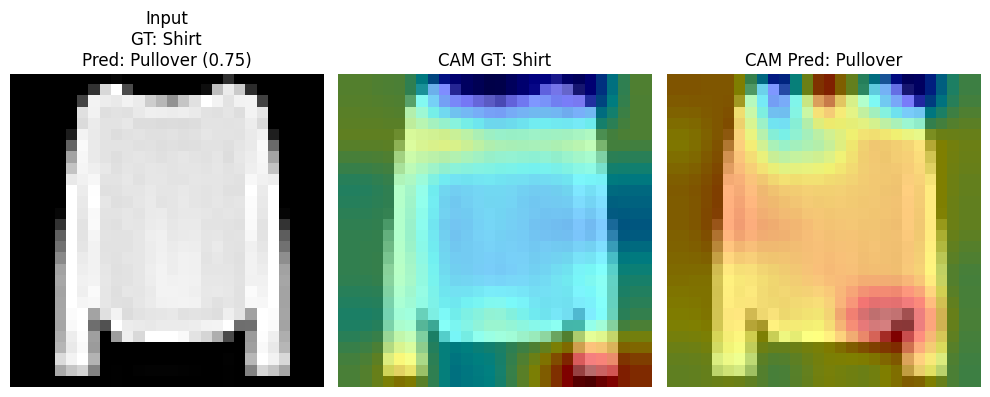

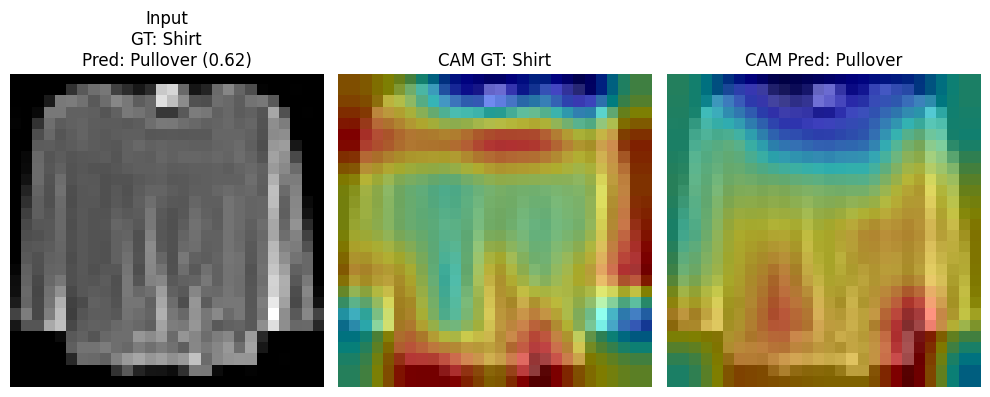

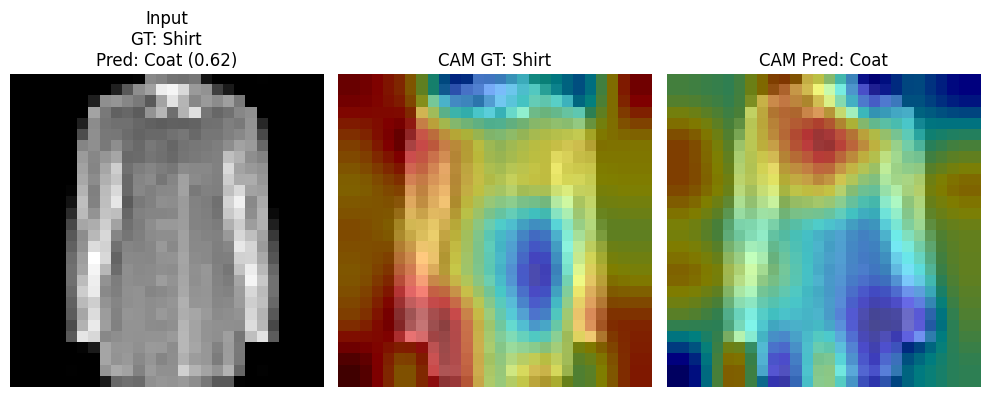

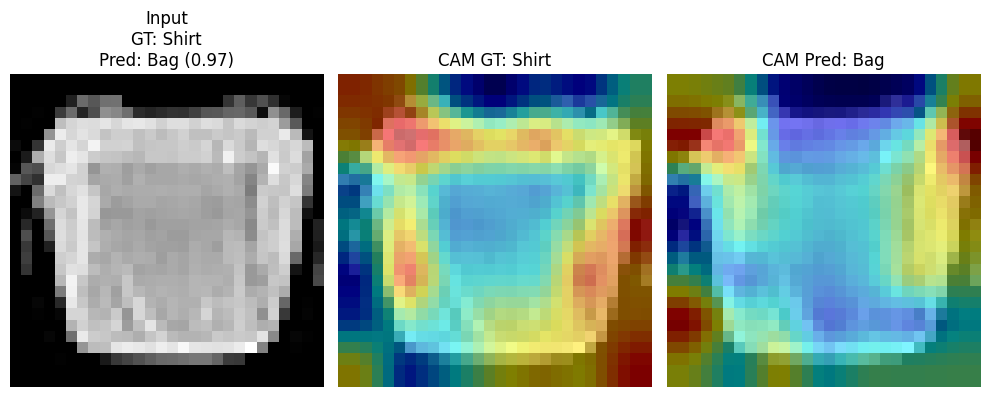

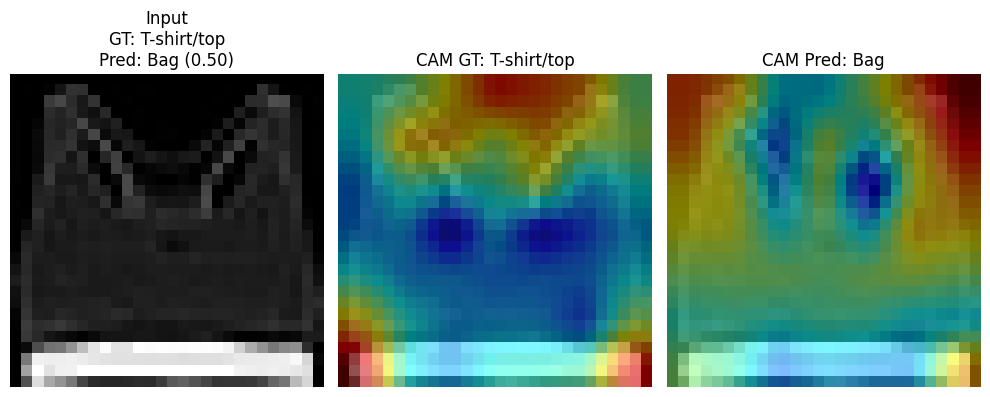

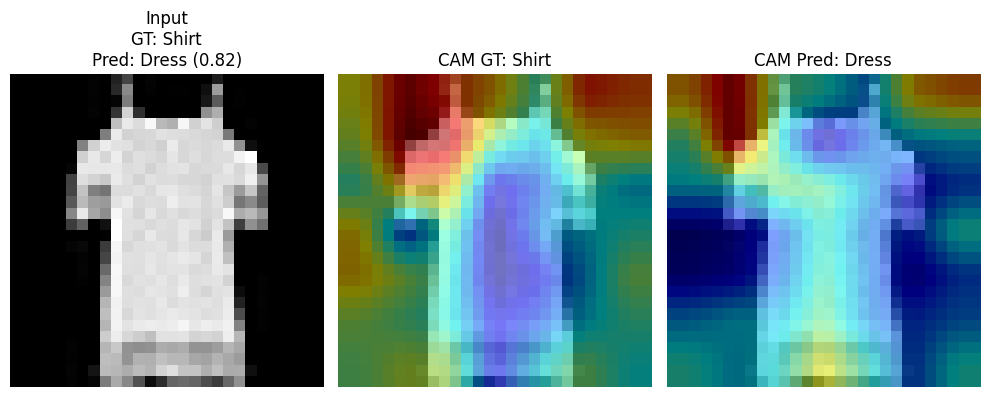

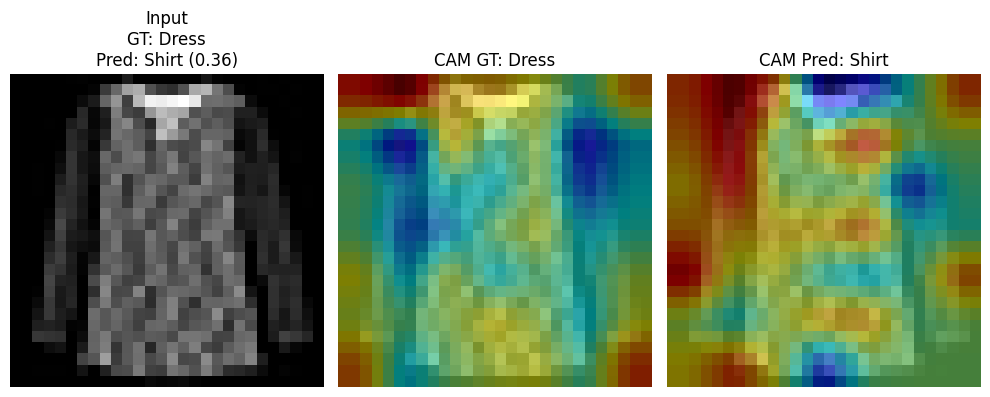

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from tqdm import tqdm
import random
import torch.nn.functional as F
import cv2
import os

# ===========================
# Configuration and Settings
# ===========================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

config = {
    'batch_size': 512,
    'learning_rate': 0.001,
    'num_epochs': 30,
    'validation_split': 0.2,
    'seed': 42,
    'num_workers': 4,
    'patience': 7
}

mean_val = 0.2860
std_val = 0.3530

# ===========================
# Data Preparation
# ===========================
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((mean_val,), (std_val,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean_val,), (std_val,))
])

train_val_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

train_size = int((1 - config['validation_split']) * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_set, val_set = random_split(
    train_val_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(config['seed'])
)

val_set.dataset.transform = transform_test

train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=config['num_workers'],
    pin_memory=True
)

val_loader = DataLoader(
    val_set,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# ===========================
# Model Definition for CAM
# ===========================
class FashionCAM(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCAM, self).__init__()
        # Increased capacity and added dropout
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # 14x14x64
            nn.Dropout(p=0.1),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)  # 7x7x128
        )

        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        # Single FC for class logits
        self.fc = nn.Linear(128, num_classes)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        self.last_conv_output = x  # store for CAM generation
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = FashionCAM(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()

# Add weight decay to reduce overfitting
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'], weight_decay=1e-4)

# Scheduler to reduce LR on plateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# ===========================
# Early Stopping
# ===========================
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss improved, saving model ...')
        torch.save(model.state_dict(), self.path)

early_stopping = EarlyStopping(patience=config['patience'], verbose=True)

# ===========================
# Training and Validation
# ===========================
def train_validate(model, criterion, optimizer, scheduler, num_epochs, train_loader, val_loader, device, early_stopping):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader, desc='Training', leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)

        # Step scheduler
        scheduler.step(epoch_val_loss)

        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

        # Early Stopping
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Load best model
    model.load_state_dict(torch.load(early_stopping.path))

    return {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

history = train_validate(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=config['num_epochs'],
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    early_stopping=early_stopping
)

# ===========================
# Plot Training/Validation Loss
# ===========================
def plot_training_history(history):
    epochs = range(1, len(history['train_losses']) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, history['train_losses'], label='Train Loss')
    plt.plot(epochs, history['val_losses'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

# ===========================
# Evaluation on Test Data
# ===========================
def evaluate_model(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Testing', leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return accuracy, f1, cm

test_accuracy, test_f1, cm = evaluate_model(model, test_loader, device)

# Save the final model
model_path = 'fashion_cnn_modified_for_CAM.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved as {model_path}")

# ===========================
# CAM Generation Functions
# ===========================
def generate_cam(feature_maps, fc_weights, class_idx):
    fc_weights = fc_weights.to(feature_maps.device)
    class_weights = fc_weights[class_idx]
    cam = torch.zeros(feature_maps.shape[1], feature_maps.shape[2], device=feature_maps.device)
    for c in range(feature_maps.shape[0]):
        cam += class_weights[c] * feature_maps[c, :, :]
    cam = cam.detach().cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam

def visualize_cam_on_image(img, cam, alpha=0.5):
    H, W = img.shape
    cam_resized = cv2.resize(cam, (W, H), interpolation=cv2.INTER_LINEAR)

    # denormalize image for visualization
    img = img * std_val + mean_val
    img = np.clip(img * 255, 0, 255).astype(np.uint8)
    img = np.stack([img, img, img], axis=2)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap * alpha + np.float32(img) / 255 * (1 - alpha)
    overlayed = np.clip(overlayed, 0, 1)
    return (overlayed * 255).astype(np.uint8)

fc_weights = model.fc.weight.data

def get_single_image_cam(model, image, label, class_labels):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)
        outputs = model(image)
        probs = F.softmax(outputs, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        pred_prob = probs[0, pred_class].item()
        gt_class = label.item()

    feature_maps = model.last_conv_output[0]
    cam_pred = generate_cam(feature_maps, fc_weights, pred_class)
    cam_gt = generate_cam(feature_maps, fc_weights, gt_class) if gt_class != pred_class else None

    return pred_class, pred_prob, cam_pred, cam_gt

def show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels):
    img_np = image.numpy().squeeze()
    plt.figure(figsize=(10, 10))

    if cam_gt is None:
        # correct prediction
        plt.subplot(1, 2, 1)
        plt.imshow(img_np*std_val+mean_val, cmap='gray')
        plt.title(f"Input\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 2, 2)
        plt.imshow(overlay_pred)
        plt.title(f"CAM: {class_labels[pred_class]}")
        plt.axis('off')
    else:
        # incorrect prediction
        plt.subplot(1, 3, 1)
        plt.imshow(img_np*std_val+mean_val, cmap='gray')
        plt.title(f"Input\nGT: {class_labels[label.item()]}\nPred: {class_labels[pred_class]} ({pred_prob:.2f})")
        plt.axis('off')

        overlay_gt = visualize_cam_on_image(img_np, cam_gt)
        plt.subplot(1, 3, 2)
        plt.imshow(overlay_gt)
        plt.title(f"CAM GT: {class_labels[label.item()]}")
        plt.axis('off')

        overlay_pred = visualize_cam_on_image(img_np, cam_pred)
        plt.subplot(1, 3, 3)
        plt.imshow(overlay_pred)
        plt.title(f"CAM Pred: {class_labels[pred_class]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# ===========================
# Select Samples for CAM Visualization
# ===========================
model.eval()
all_images = []
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_images.append(images.cpu())
        all_labels.append(labels.cpu())
        all_preds.append(preds.cpu())

all_images = torch.cat(all_images)
all_labels = torch.cat(all_labels)
all_preds = torch.cat(all_preds)

correct_idx = (all_preds == all_labels)
incorrect_idx = (all_preds != all_labels)

correct_images = all_images[correct_idx]
correct_labels = all_labels[correct_idx]

incorrect_images = all_images[incorrect_idx]
incorrect_labels = all_labels[incorrect_idx]

# For the 10 correct predictions (one from each class)
picked_correct = []
class_found = set()
for i in range(len(correct_images)):
    c = correct_labels[i].item()
    if c not in class_found:
        picked_correct.append(i)
        class_found.add(c)
    if len(class_found) == 10:
        break

if len(incorrect_images) > 30:
    picked_incorrect = np.random.choice(range(len(incorrect_images)), size=30, replace=False)
else:
    picked_incorrect = range(len(incorrect_images))

print("Showing CAMs for 10 correct predictions (one from each class):")
for idx in picked_correct:
    image = correct_images[idx]
    label = correct_labels[idx]
    pred_class, pred_prob, cam_pred, _ = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, None, class_labels)

print("Showing CAMs for 30 incorrect predictions:")
count = 0
for idx in picked_incorrect:
    image = incorrect_images[idx]
    label = incorrect_labels[idx]
    pred_class, pred_prob, cam_pred, cam_gt = get_single_image_cam(model, image, label, class_labels)
    show_result(image, label, pred_class, pred_prob, cam_pred, cam_gt, class_labels)
    count += 1
    if count >= 30:
        break
